# Synthetic Dataset for Risk Assessment and Loan Approval Modeling

---



This synthetic dataset comprises 20,000 records of personal and financial data, designed to facilitate the development of predictive models for risk assessment. The dataset includes diverse features such as demographic information, credit history, employment status, income levels, existing debt, and other relevant financial metrics, providing a comprehensive foundation for sophisticated data-driven analysis and decision-making.
It serves two primary purposes:

1. Risk Score Regression: To predict a continuous risk score associated with each individual's likelihood of loan default or financial instability.
2. Binary Classification: To determine the binary outcome of loan approval, indicating whether an applicant is likely to be approved or denied for a loan.

https://www.kaggle.com/datasets/lorenzozoppelletto/financial-risk-for-loan-approval/data

In [1]:
# ------------------------------
# Data Wrangling and Manipulation
# ------------------------------
import pandas as pd # For handling and manipulating structured data.
import numpy as np # For numerical computations and array operations.
# ------------------------------
# Data Visualization
# ------------------------------
import matplotlib.pyplot as plt # For basic plotting
import seaborn as sns # For advanced stastical visualizations
# ------------------------------
# Data Preprocessing & Feature Engineering
# ------------------------------
from sklearn.preprocessing import StandardScaler # Standardization (mean=0, variance=1)
from sklearn.preprocessing import MinMaxScaler # Normalization (scales data between 0 and 1)
from sklearn.preprocessing import LabelEncoder # Encodes categorical labels as numbers
from sklearn.preprocessing import OneHotEncoder # Converts categorical features to one-hot encoding
from sklearn.impute import SimpleImputer # Handles missing values
# ------------------------------
# Dimensionality Reduction & Feature selection
# ------------------------------
from sklearn.decomposition import PCA # Principal Component Analysis for dimensionality reduction
from sklearn.feature_selection import SelectKBest,f_classif # Feature selection
# ------------------------------
# Model Selection and Evaluation
# ------------------------------
from sklearn.model_selection import train_test_split # Splits dataset into training and test sets
from sklearn.model_selection import cross_validate # Performs cross-validation
from sklearn.model_selection import KFold # K-Fold cross-validation
from sklearn.model_selection import GridSearchCV # Hyperparameter tuning using grid search
# ------------------------------
# Performance Metrics
# ------------------------------
from sklearn.metrics import accuracy_score # Evaluates model accuracy
from sklearn.metrics import confusion_matrix # Computes confusion matrix
from sklearn.metrics import classification_report # Precision, recall, F1-score summary
from sklearn.metrics import precision_score # Precision metric
from sklearn.metrics import recall_score # Recall metric
from sklearn.metrics import roc_auc_score # AUC-ROC score for evaluating classifiers
from sklearn import metrics # Collection of evaluation metrics
# ------------------------------
# Handling Imbalaced Datasets
# ------------------------------
from imblearn.over_sampling import SMOTE # Synthetic Minority Over-sampling Technique (for handling class imbalance)
from sklearn.utils import class_weight # Assigns weights to imbalanced classes
# ------------------------------
# Machine Learning Algorithms - Classification
# ------------------------------
from sklearn.linear_model import LogisticRegression # Logistic Regression model
from sklearn.neighbors import KNeighborsClassifier # K-Nearest Neighbors Classifier
from sklearn.svm import SVC # Support Vector Classifier
from sklearn.ensemble import RandomForestClassifier # Random Forest classifier
from sklearn.naive_bayes import GaussianNB # Naive Bayes classifier
from xgboost import XGBClassifier # Extreme Gradient Boosting classifier
from sklearn.tree import DecisionTreeClassifier # Decision Tree classifier
from sklearn.ensemble import ExtraTreesClassifier # Extra Trees classifier
from sklearn.linear_model import SGDClassifier # Stochastic Gradient Descent classifier
# ------------------------------
# Utility Fuctions
# ------------------------------
from sklearn.pipeline import make_pipeline # Creates machines learning pipelines
from sklearn.datasets import make_classification # Generates symthetic classification datasets
from sklearn import model_selection # Various model selection utilities
from sklearn import svm # Support Vector Machines module
from sklearn import tree # Decision tree-related utilities
#models
# for regression algorithms
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor,RandomForestRegressor,BaggingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

In [2]:
loan_df=pd.read_csv('/content/Loan - Loan.csv')
loan_df

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,01-01-2018,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,02-01-2018,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,03-01-2018,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,04-01-2018,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,05-01-2018,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179141,0.070210,1,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,29-09-2072,44,30180,587,Employed,High School,19,24521,36,Married,...,2515.000000,0.826217,1,55327,0.216021,0.195574,905.767712,0.627741,0,55.0
19996,30-09-2072,56,49246,567,Employed,Associate,33,25818,36,Married,...,4103.833333,0.816618,3,64002,0.227318,0.199168,958.395633,0.334418,0,54.0
19997,01-10-2072,44,48958,645,Employed,Bachelor,20,37033,72,Married,...,4079.833333,0.887216,3,103663,0.229533,0.226766,945.427454,0.357227,0,45.0
19998,02-10-2072,60,41025,560,Employed,High School,36,14760,72,Married,...,3418.750000,0.843787,5,10600,0.249760,0.264873,411.168284,0.408678,0,59.0


# Step 1:Understanding the Data

---




In [3]:
loan_df.shape

(20000, 36)

In [4]:
print(f"The Loan Approval Dataset has {loan_df.shape[0]}occurences and {loan_df.shape[1]} features")

The Loan Approval Dataset has 20000occurences and 36 features


In [5]:
loan_df.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,01-01-2018,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,02-01-2018,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,03-01-2018,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,04-01-2018,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,05-01-2018,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179141,0.070210,1,36.0


In [6]:
loan_df.tail()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
19995,29-09-2072,44,30180,587,Employed,High School,19,24521,36,Married,...,2515.000000,0.826217,1,55327,0.216021,0.195574,905.767712,0.627741,0,55.0
19996,30-09-2072,56,49246,567,Employed,Associate,33,25818,36,Married,...,4103.833333,0.816618,3,64002,0.227318,0.199168,958.395633,0.334418,0,54.0
19997,01-10-2072,44,48958,645,Employed,Bachelor,20,37033,72,Married,...,4079.833333,0.887216,3,103663,0.229533,0.226766,945.427454,0.357227,0,45.0
19998,02-10-2072,60,41025,560,Employed,High School,36,14760,72,Married,...,3418.750000,0.843787,5,10600,0.249760,0.264873,411.168284,0.408678,0,59.0
19999,03-10-2072,20,53227,574,Employed,Associate,0,32055,48,Married,...,4435.583333,0.853801,5,41372,0.240055,0.242693,1049.830407,0.298006,0,59.0


In [7]:
loan_df.sample()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
6634,01-03-2036,30,26645,489,Employed,High School,7,17705,48,Single,...,2220.416667,0.786403,12,74739,0.268205,0.231307,568.740237,0.441692,0,51.0


In [8]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

In [9]:
loan_df.describe()

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,39.752600,59161.473550,571.612400,17.522750,24882.867800,54.057000,1.517300,454.292700,0.286381,3.023350,...,4891.715521,0.799918,5.002650,7.229432e+04,0.239124,0.239110,911.607052,0.402182,0.239000,50.766780
std,11.622713,40350.845168,50.997358,11.316836,13427.421217,24.664857,1.386325,240.507609,0.159793,1.736161,...,3296.771598,0.120665,2.236804,1.179200e+05,0.035509,0.042205,674.583473,0.338924,0.426483,7.778262
min,18.000000,15000.000000,343.000000,0.000000,3674.000000,12.000000,0.000000,50.000000,0.000974,0.000000,...,1250.000000,0.259203,0.000000,1.000000e+03,0.130101,0.113310,97.030193,0.016043,0.000000,28.800000
25%,32.000000,31679.000000,540.000000,9.000000,15575.000000,36.000000,0.000000,286.000000,0.160794,2.000000,...,2629.583333,0.727379,3.000000,8.734750e+03,0.213889,0.209142,493.763700,0.179693,0.000000,46.000000
50%,40.000000,48566.000000,578.000000,17.000000,21914.500000,48.000000,1.000000,402.000000,0.266673,3.000000,...,4034.750000,0.820962,5.000000,3.285550e+04,0.236157,0.235390,728.511452,0.302711,0.000000,52.000000
75%,48.000000,74391.000000,609.000000,25.000000,30835.000000,72.000000,2.000000,564.000000,0.390634,4.000000,...,6163.000000,0.892333,6.000000,8.882550e+04,0.261533,0.265532,1112.770758,0.509214,0.000000,56.000000
max,80.000000,485341.000000,712.000000,61.000000,184732.000000,120.000000,5.000000,2919.000000,0.917380,13.000000,...,25000.000000,0.999433,16.000000,2.603208e+06,0.405029,0.446787,10892.629520,4.647657,1.000000,84.000000


In [10]:
loan_df.describe(include=['O'])

,ApplicationDate,EmploymentStatus,EducationLevel,MaritalStatus,HomeOwnershipStatus,LoanPurpose
count,20000,20000,20000,20000,20000,20000
unique,20000,3,5,4,4,5
top,17-09-2072,Employed,Bachelor,Married,Mortgage,Home
freq,1,17036,6054,10041,7939,5925


**Explanation of the features in the dataset:**

1. **ApplicationDate**: The date when the loan application was submitted.
2. **Age**: The age of the loan applicant.
3. **AnnualIncome**: The yearly income of the applicant, typically used to evaluate loan repayment capacity.
4. **CreditScore**: A numerical representation of the applicant’s creditworthiness based on their credit history.
5. **EmploymentStatus**: The current employment status of the applicant (e.g., employed, unemployed, self-employed).
6. **EducationLevel**: The highest level of education attained by the applicant.
7. **Experience**: The number of years the applicant has been in their current occupation or field.
8. **LoanAmount**: The amount of money the applicant is requesting as a loan.
9. **LoanDuration**: The period (in months or years) over which the loan is to be repaid.
10. **MaritalStatus**: The marital status of the applicant (e.g., single, married, divorced).
11. **NumberOfDependents**: The number of people financially dependent on the applicant (e.g., children, elderly parents).
12. **HomeOwnershipStatus**: Whether the applicant owns, rents, or has other living arrangements regarding their home.
13. **MonthlyDebtPayments**: The total amount the applicant is currently paying each month toward their existing debts.
14. **CreditCardUtilizationRate**: The percentage of available credit being used by the applicant (credit card balance divided by total credit limit).
15. **NumberOfOpenCreditLines**: The number of active credit accounts the applicant has (e.g., credit cards, loans).
16. **NumberOfCreditInquiries**: The number of times a credit inquiry has been made on the applicant’s account (usually when applying for credit).
17. **DebtToIncomeRatio**: The ratio of the applicant’s total monthly debt payments to their monthly income, used to assess their ability to take on more debt.
18. **BankruptcyHistory**: Indicates whether the applicant has filed for bankruptcy in the past.
19. **LoanPurpose**: The reason why the applicant is seeking the loan (e.g., home improvement, education, medical).
20. **PreviousLoanDefaults**: The number of times the applicant has defaulted on previous loans.
21. **PaymentHistory**: A record of the applicant’s past payments on loans and credit lines.
22. **LengthOfCreditHistory**: The number of years the applicant has had active credit accounts.
23. **SavingsAccountBalance**: The amount of money in the applicant’s savings account.
24. **CheckingAccountBalance**: The amount of money in the applicant’s checking account.
25. **TotalAssets**: The total value of assets owned by the applicant (e.g., property, vehicles, investments).
26. **TotalLiabilities**: The total amount of liabilities (debts) the applicant owes.
27. **MonthlyIncome**: The applicant’s total monthly income.
28. **UtilityBillsPaymentHistory**: A record of how well the applicant has managed paying their utility bills.
29. **JobTenure**: The length of time the applicant has held their current job.
30. **NetWorth**: The difference between the applicant’s total assets and total liabilities.
31. **BaseInterestRate**: The general interest rate set by the financial institution or the market.
32. **InterestRate**: The specific interest rate offered to the applicant for the loan.
33. **MonthlyLoanPayment**: The amount the applicant will need to pay each month to repay the loan.
34. **TotalDebtToIncomeRatio**: A more comprehensive debt-to-income ratio that includes all of the applicant’s liabilities.
35. **`LoanApproved`**: Indicates whether the loan was approved or not (usually binary: Yes/No).
36. **`RiskScore`**: A score representing the risk level of the applicant, usually derived from various financial and personal factors to help determine loan approval and interest rate.

These features help in assessing the financial health, creditworthiness, and risk profile of the loan applicant, which ultimately determines loan approval, terms, and interest rates.

# **VISUALIZATIONS OF THE FEATURES**

---



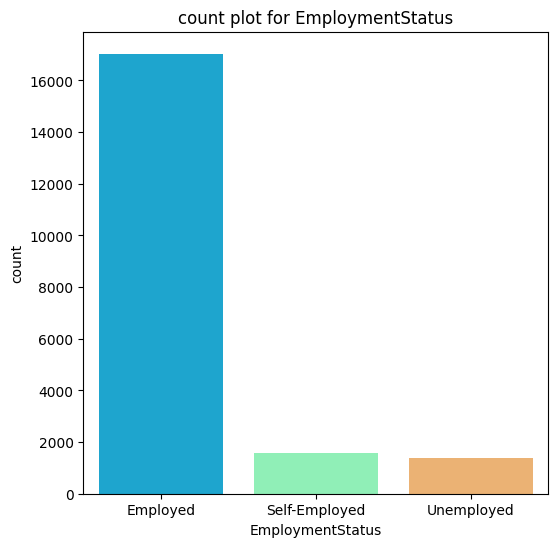

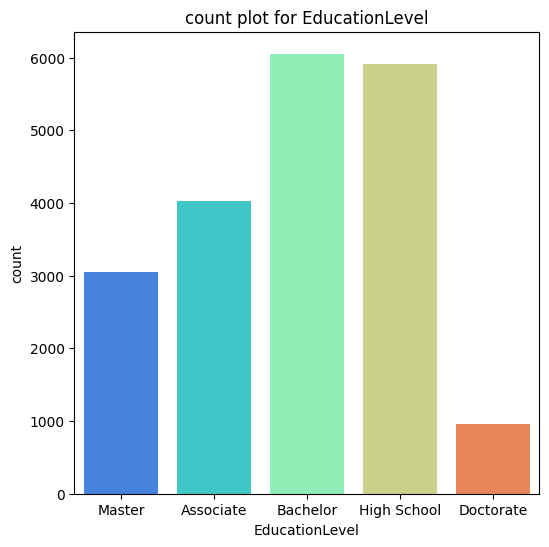

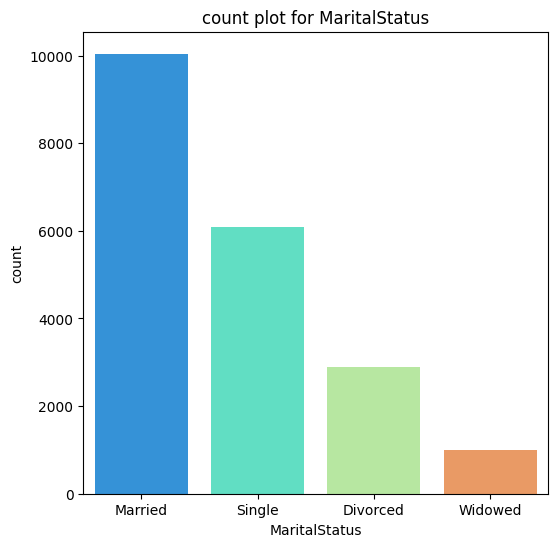

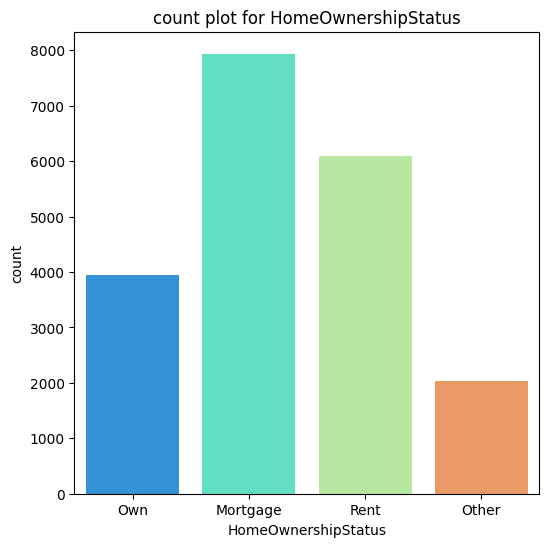

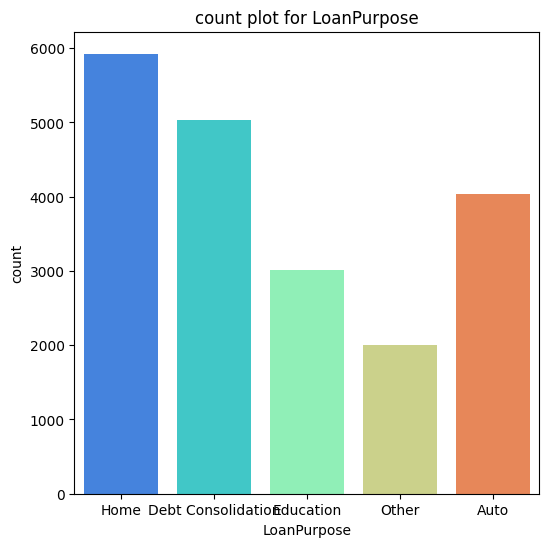

In [11]:
categorical_columns=loan_df.select_dtypes(include=['object','category']).columns.tolist()
for col in categorical_columns[1:]:
  plt.figure(figsize=(6,6))
  sns.countplot(data=loan_df,x=col,hue=col,palette='rainbow')
  plt.title(f"count plot for {col}")
  plt.show()

Most of the loan needed persons are:


*   Employed
*   Married

*   Comparitively less educated
*   Need loan for building home




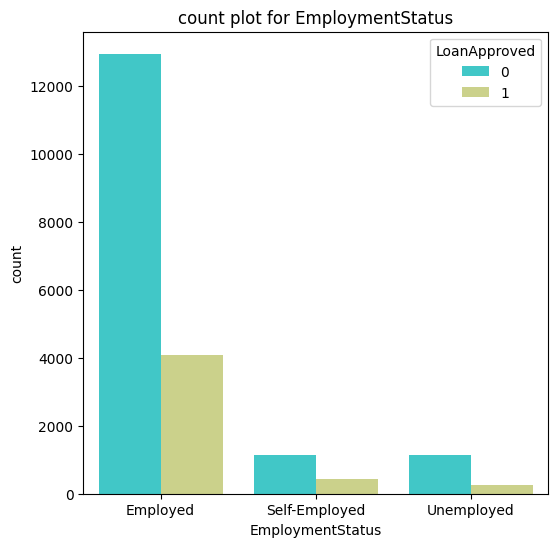

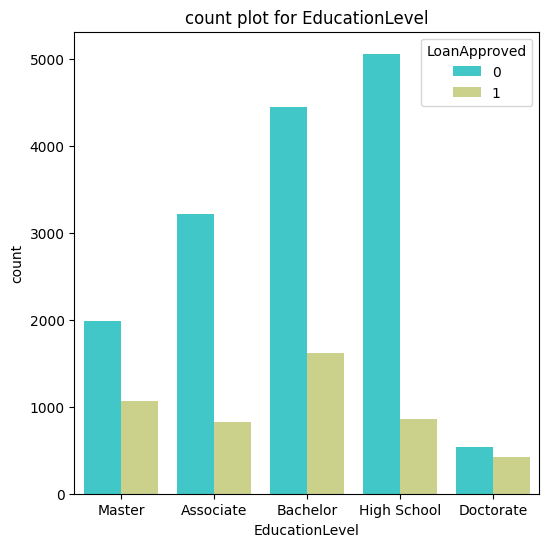

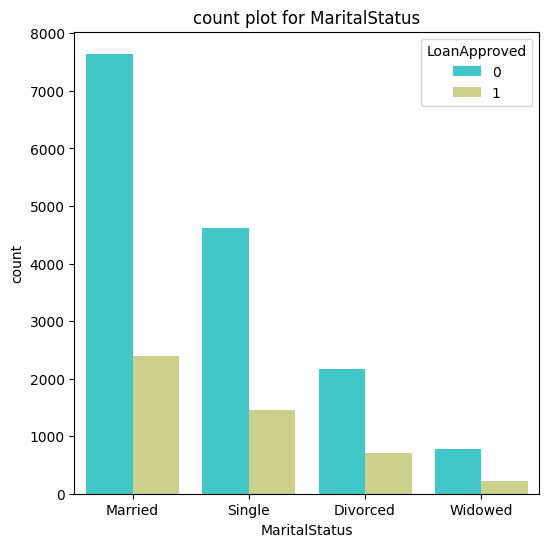

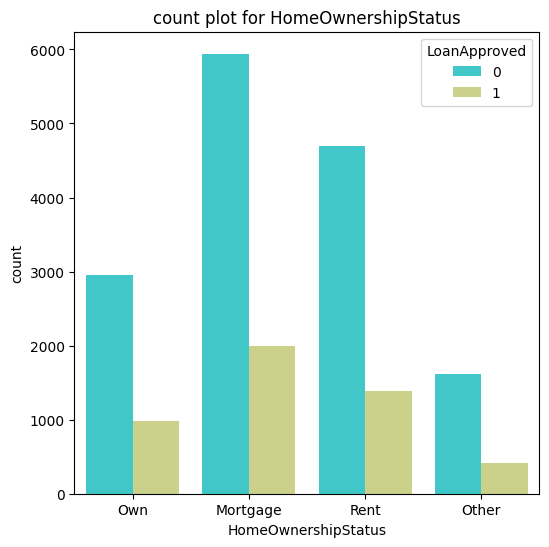

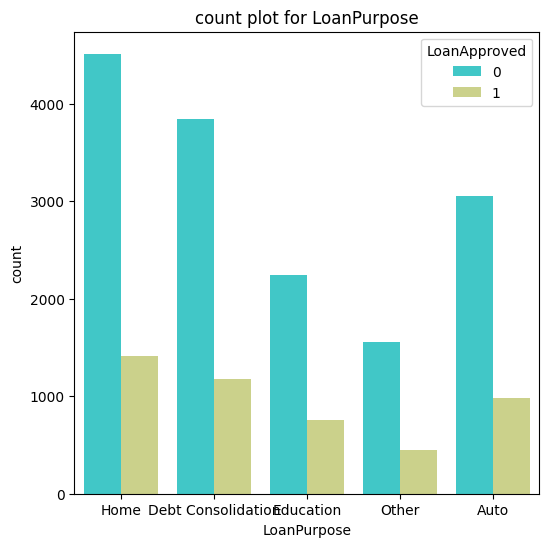

In [12]:
for col in categorical_columns[1:]:
  plt.figure(figsize=(6,6))
  sns.countplot(data=loan_df,x=col,hue='LoanApproved',palette='rainbow')
  plt.title(f"count plot for {col}")
  plt.show()

Majority of loan requests are rejected in all categories(There might be some other reason affecting the riskscore).

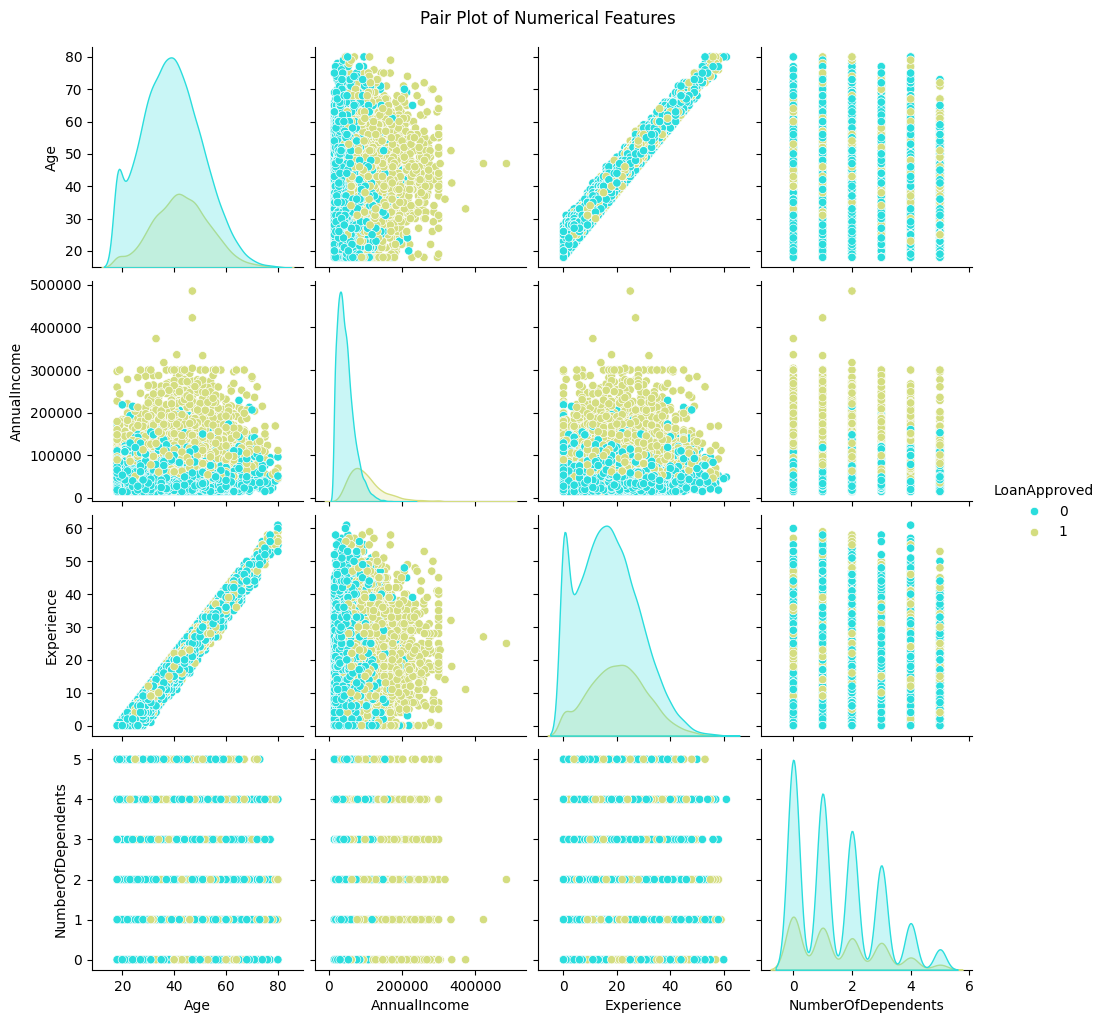

In [13]:
  sns.pairplot(loan_df[['Age','AnnualIncome','Experience','NumberOfDependents','LoanApproved']],hue='LoanApproved',palette='rainbow')
  plt.suptitle("Pair Plot of Numerical Features",y=1.02)
  plt.show()

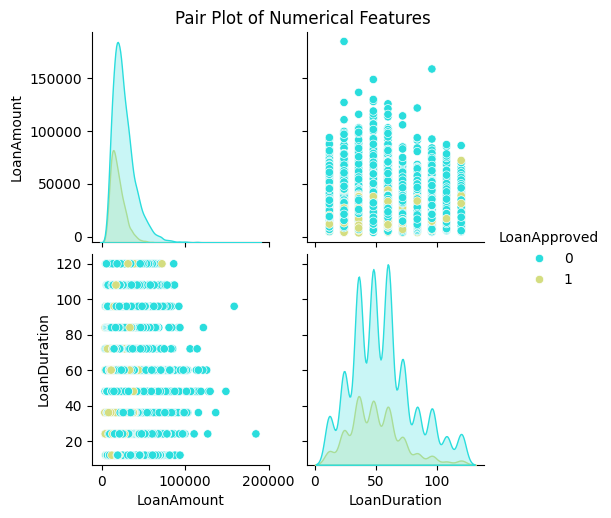

In [14]:
  sns.pairplot(loan_df[['LoanAmount','LoanDuration','LoanApproved']],hue='LoanApproved',palette='rainbow')
  plt.suptitle("Pair Plot of Numerical Features",y=1.02)
  plt.show()

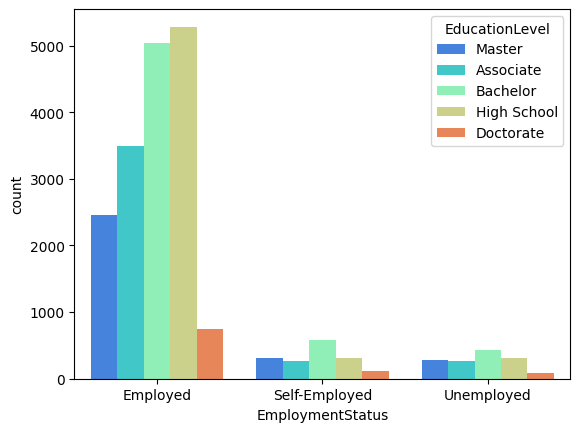

In [15]:
sns.countplot(data=loan_df,x='EmploymentStatus',hue='EducationLevel',palette='rainbow')
plt.show()

# Target Variable-y


*  Risk Score;To predict a continuous risk score associated with each individual's likelihood of loan default or financial instability.
*   Loan Approval:To determine the binary outcome of loan approval, indicating whether an applicant is likely to be approved or denied for a loan

<ipython-input-16-3c3e2bb88fa4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  cp=sns.barplot(x='LoanApproved',y='LoanAmount',data=loan_df,palette='cool')


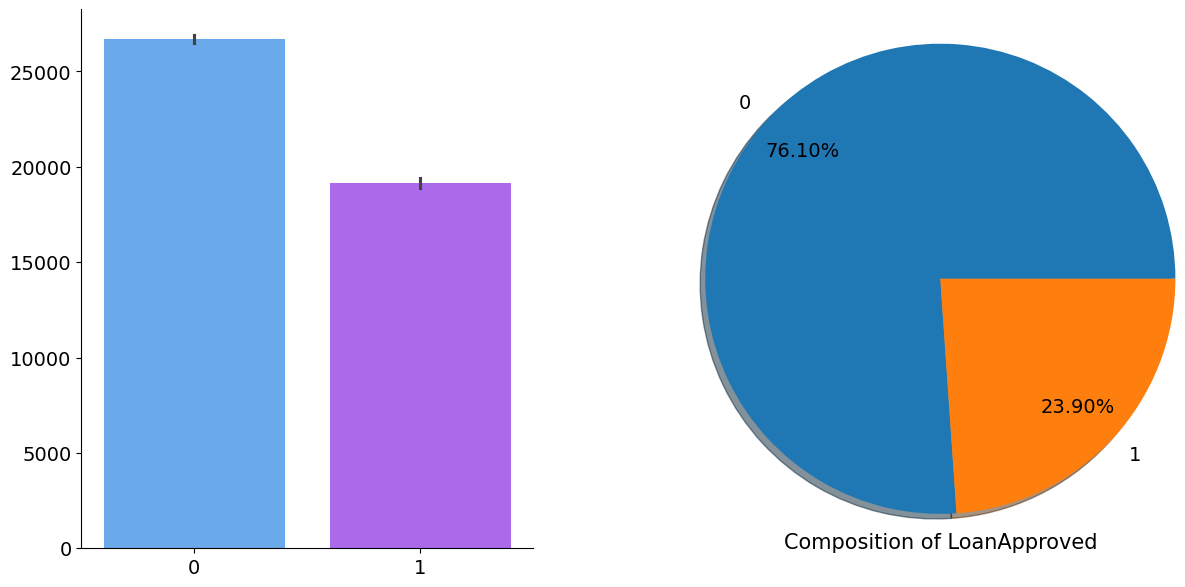

In [16]:
plt.figure(figsize=(14,7))
ax1=plt.subplot(1,2,1)
cp=sns.barplot(x='LoanApproved',y='LoanAmount',data=loan_df,palette='cool')
ax1.set_xlabel("")
ax1.set_ylabel("")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine(top=True,right=True)
ax2=plt.subplot(1,2,2)
plt.pie(loan_df['LoanApproved'].value_counts(),labels=list(loan_df['LoanApproved'].unique()),autopct='%2.2f%%',pctdistance=0.8,shadow=True,radius=1.3,textprops={'fontsize':14})
ax2.set_xlabel("")
plt.xlabel('Composition of LoanApproved',fontsize=15,labelpad=20)
plt.subplots_adjust(wspace=0.4)
plt.show()

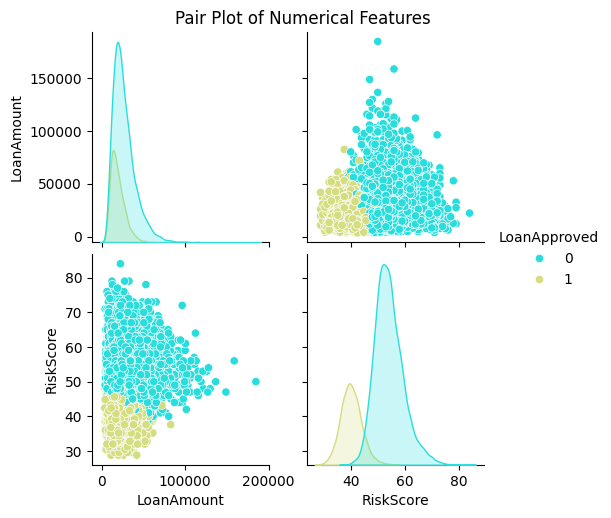

In [17]:
sns.pairplot(loan_df[['LoanAmount','RiskScore','LoanApproved']],hue='LoanApproved',palette='rainbow')
plt.suptitle("Pair Plot of Numerical Features",y=1.02)
plt.show()

<ipython-input-18-4227399b7c77>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=loan_df,x='LoanApproved',y='LoanAmount',palette='rainbow')


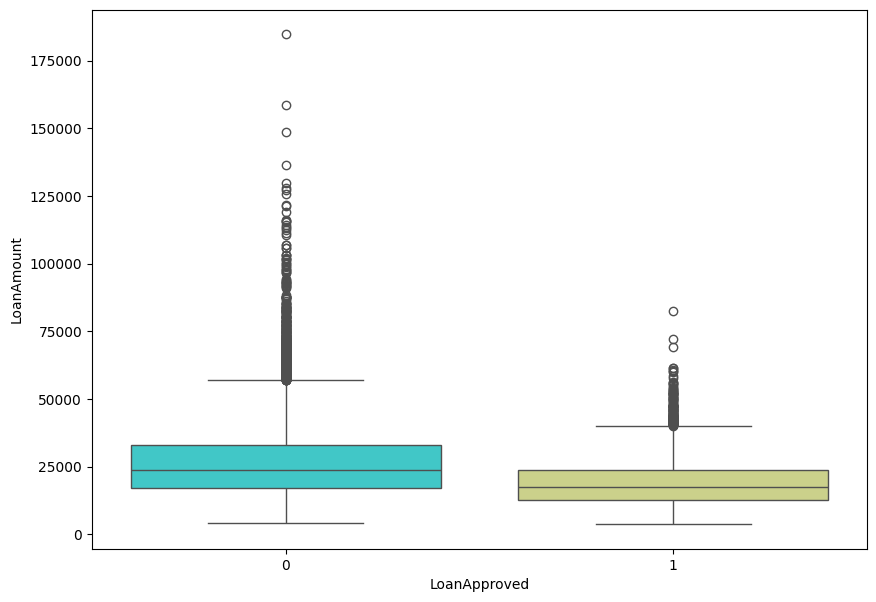

In [18]:
plt.figure(figsize=(10,7))
sns.boxplot(data=loan_df,x='LoanApproved',y='LoanAmount',palette='rainbow')
plt.show()

<ipython-input-19-76800e1edf14>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=loan_df,x='LoanApproved',y='RiskScore',palette='rainbow')


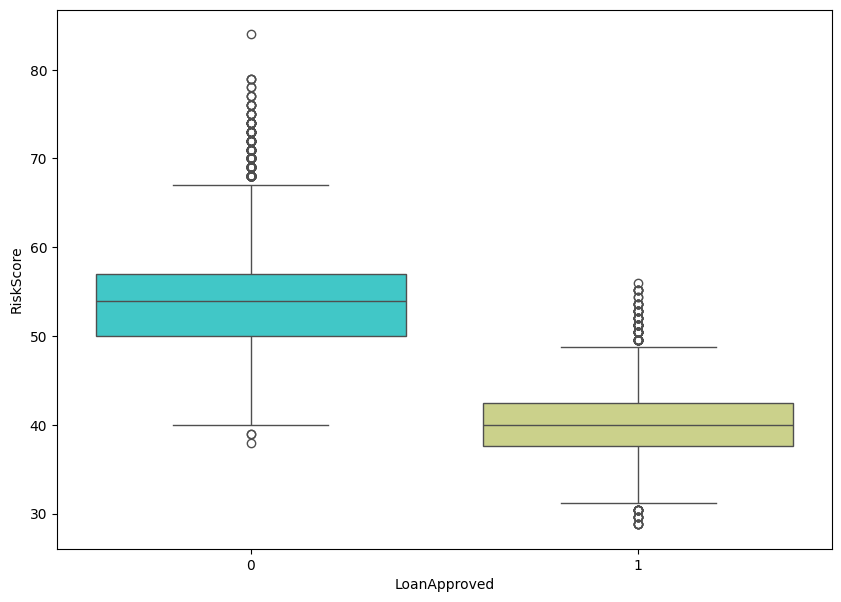

In [19]:
plt.figure(figsize=(10,7))
sns.boxplot(data=loan_df,x='LoanApproved',y='RiskScore',palette='rainbow')
plt.show()

# Data cleaning

##Handling Null/Duplicates values

In [20]:
loan_df.isnull().sum()

,0
ApplicationDate,0
Age,0
AnnualIncome,0
CreditScore,0
EmploymentStatus,0
EducationLevel,0
Experience,0
LoanAmount,0
LoanDuration,0
MaritalStatus,0


In [21]:
loan_df.duplicated().sum()

np.int64(0)

# Feature Engineering

In [22]:
loan_df['BankBalance']=loan_df['SavingsAccountBalance']+loan_df['CheckingAccountBalance']
loan_df.drop(['SavingsAccountBalance','CheckingAccountBalance'],axis=1,inplace=True)

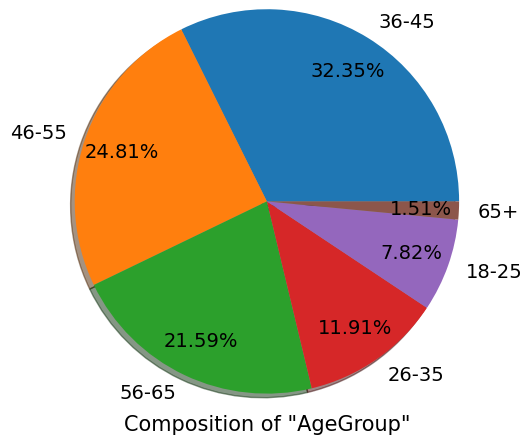

In [23]:
loan_df['AgeGroup']=pd.cut(loan_df['Age'],bins=[0,25,35,45,55,65,100],labels=['18-25','26-35','36-45','46-55','56-65','65+'])
plt.pie(x=loan_df['AgeGroup'].value_counts(),labels=list(loan_df['AgeGroup'].unique()),autopct='%2.2f%%',pctdistance=0.8,shadow=True,radius=1.3,textprops={'fontsize':14})
plt.xlabel('Composition of "AgeGroup"',fontsize=15,labelpad=20)
plt.show()

In [24]:
loan_df.drop('AgeGroup',axis=1,inplace=True)

In [25]:
loan_df[['year','month','day']]=loan_df['ApplicationDate'].str.split('-',expand=True)
loan_df['year']=loan_df['year'].astype(int)
loan_df['month']=loan_df['month'].astype(int)
loan_df['day']=loan_df['day'].astype(int)

loan_df[['ApplicationDate','year','month','day']]

,ApplicationDate,year,month,day
0,01-01-2018,1,1,2018
1,02-01-2018,2,1,2018
2,03-01-2018,3,1,2018
3,04-01-2018,4,1,2018
4,05-01-2018,5,1,2018
...,...,...,...,...
19995,29-09-2072,29,9,2072
19996,30-09-2072,30,9,2072
19997,01-10-2072,1,10,2072
19998,02-10-2072,2,10,2072


In [26]:
loan_df['year'].max()

31

So this column contains wrong informations.

In [27]:
#the ApplicationDate feature have errors. so drop it
loan_df.drop(['ApplicationDate','year','month','day'],axis=1,inplace=True)

##Encoding

In [28]:
categorical_columns=loan_df.select_dtypes(include=['object','category']).columns.tolist()
categorical_columns

['EmploymentStatus',
 'EducationLevel',
 'MaritalStatus',
 'HomeOwnershipStatus',
 'LoanPurpose']

###Ordinal data
Many machine learning models,like decision trees and regression models, rely on the relative order of numeric values.By manually assigning meaningful numbers,the model can better capture the relationship between the ordinal categories.

In [29]:
loan_df['EmploymentStatus'].unique()

array(['Employed', 'Self-Employed', 'Unemployed'], dtype=object)

In [30]:
loan_df['EmploymentStatus']=loan_df['EmploymentStatus'].replace({'Employed':0,'Unemployed':1,'Self-Employed':2})

<ipython-input-30-fc8f5a1370c2>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_df['EmploymentStatus']=loan_df['EmploymentStatus'].replace({'Employed':0,'Unemployed':1,'Self-Employed':2})


In [31]:
loan_df['EmploymentStatus'].unique()

array([0, 2, 1])

In [32]:
loan_df['EducationLevel'].unique()

array(['Master', 'Associate', 'Bachelor', 'High School', 'Doctorate'],
      dtype=object)

In [33]:
loan_df['EducationLevel']=loan_df['EducationLevel'].map({'High School':0,'Associate':1,'Bachelor':2,'Master':3,'Doctorate':4})

In [34]:
loan_df['EducationLevel'].unique()

array([3, 1, 2, 0, 4])

###Nominal Data

In [35]:
le=LabelEncoder()
#exclude the 'ApplicationDate' column
for cols in loan_df.select_dtypes('object').columns:
  if cols!='ApplicationDate':
    loan_df[cols]=le.fit_transform(loan_df[cols])

In [36]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         20000 non-null  int64  
 1   AnnualIncome                20000 non-null  int64  
 2   CreditScore                 20000 non-null  int64  
 3   EmploymentStatus            20000 non-null  int64  
 4   EducationLevel              20000 non-null  int64  
 5   Experience                  20000 non-null  int64  
 6   LoanAmount                  20000 non-null  int64  
 7   LoanDuration                20000 non-null  int64  
 8   MaritalStatus               20000 non-null  int64  
 9   NumberOfDependents          20000 non-null  int64  
 10  HomeOwnershipStatus         20000 non-null  int64  
 11  MonthlyDebtPayments         20000 non-null  int64  
 12  CreditCardUtilizationRate   20000 non-null  float64
 13  NumberOfOpenCreditLines     200

# Data Transformation

##Skewed Data

###Histograms

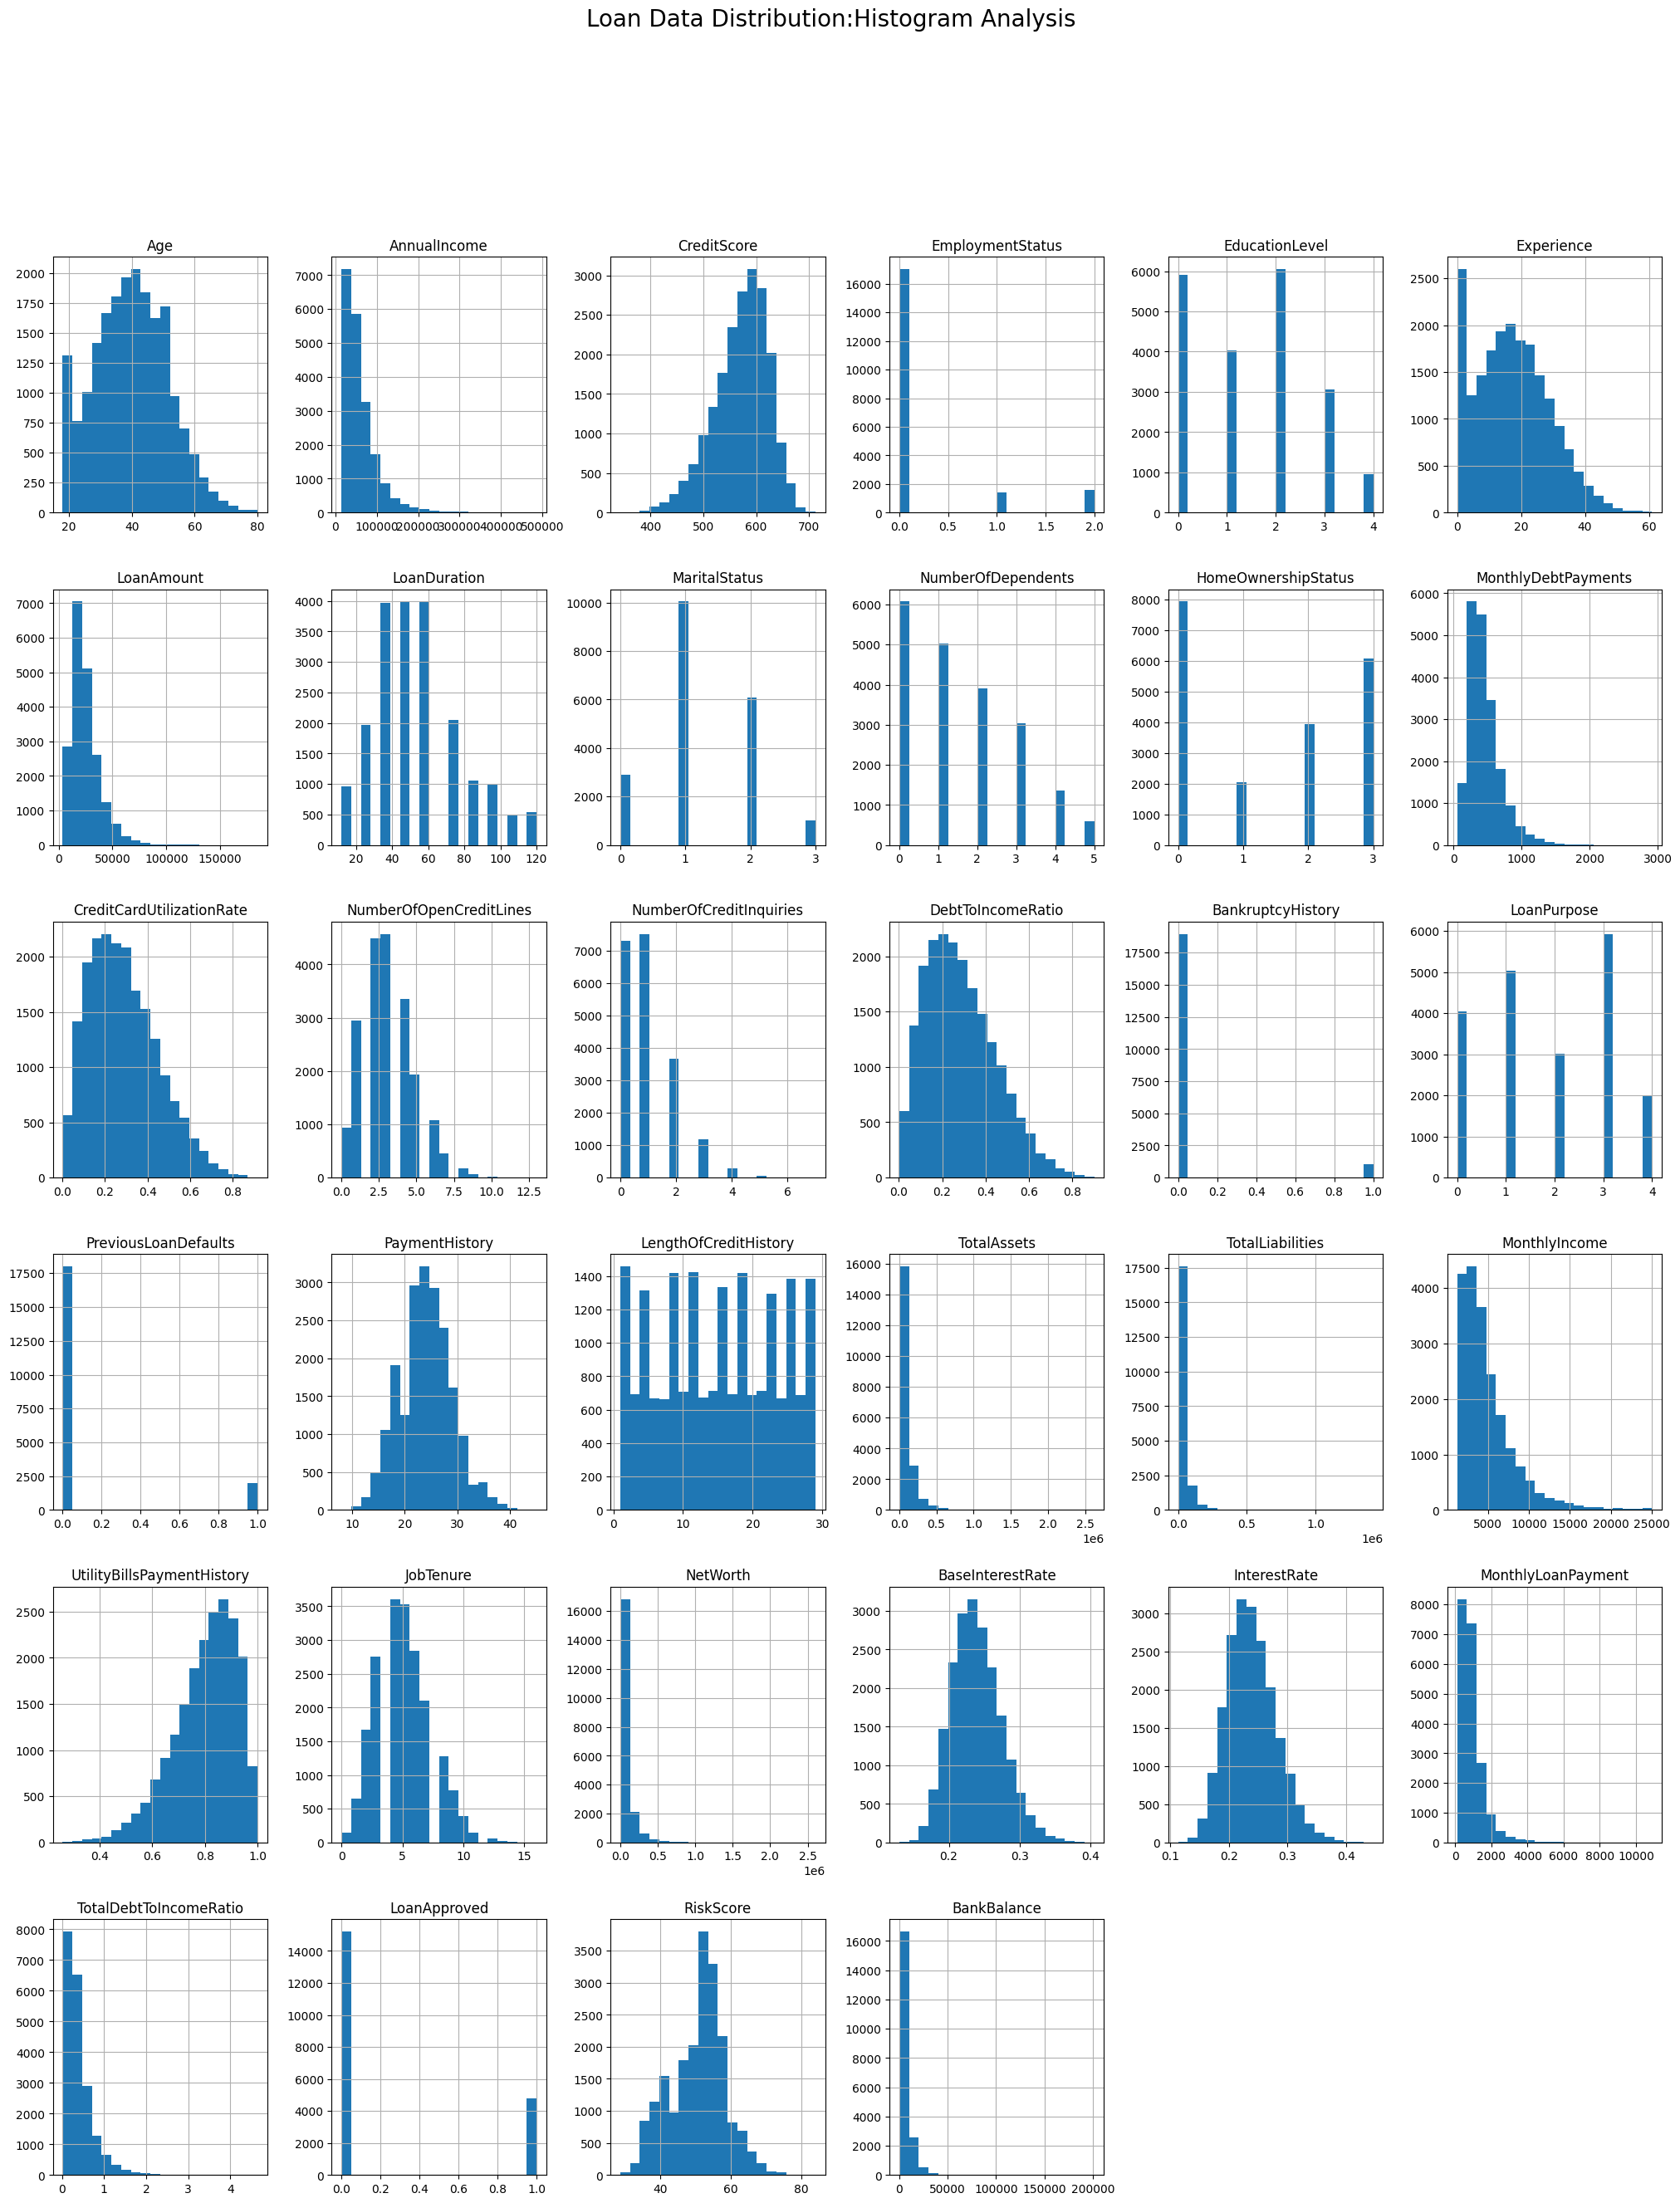

In [37]:
loan_df.hist(figsize=(25,30),bins=20)
plt.suptitle("Loan Data Distribution:Histogram Analysis",fontsize=20)
plt.show()

In [38]:
skewness=loan_df.skew()
sorted_skewness=skewness.sort_values(ascending=False)
sorted_skewness

,0
TotalLiabilities,5.848874
NetWorth,5.599844
TotalAssets,5.311326
BankBalance,5.264327
BankruptcyHistory,4.017672
MonthlyLoanPayment,3.081845
PreviousLoanDefaults,2.665941
TotalDebtToIncomeRatio,2.574494
EmploymentStatus,2.400820
AnnualIncome,2.088948


In [39]:
loan_df_copy=loan_df.copy()
loan_df['AnnualIncome']=np.log1p(loan_df['AnnualIncome'])
loan_df['LoanAmount']=np.log1p(loan_df['LoanAmount'])

The log1p function in Numpy stands for log(1+x),where "1p" refers to adding 1 to the input value before taking the logarithm.

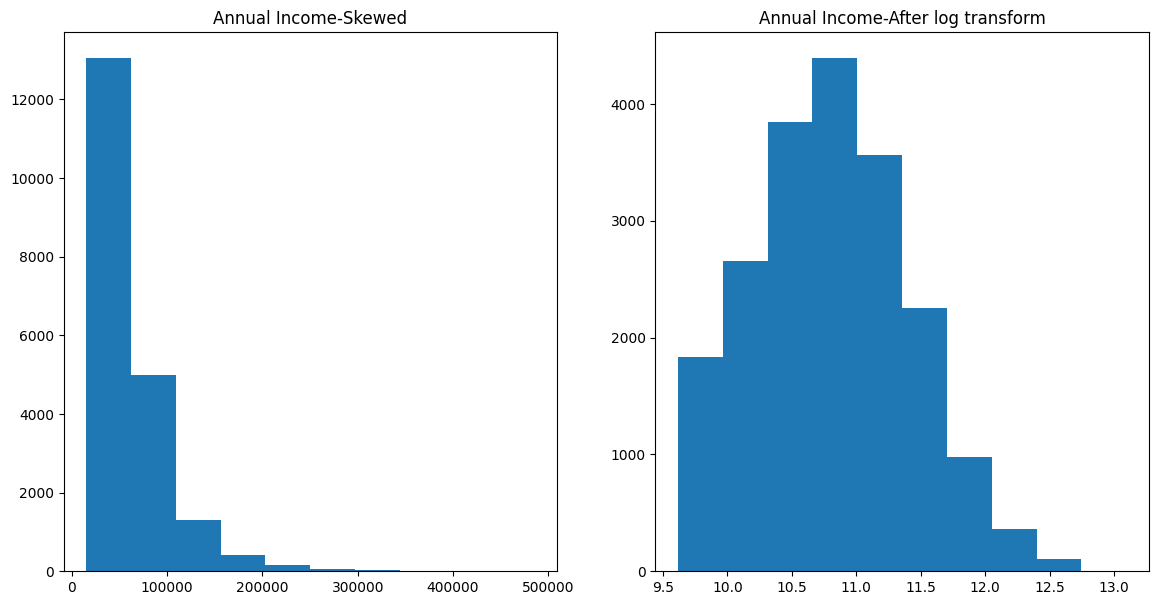

In [40]:
plt.figure(figsize=(14,7))
ax1=plt.subplot(1,2,1)
cp=plt.hist(loan_df_copy['AnnualIncome'])
plt.title("Annual Income-Skewed")
ax2=plt.subplot(1,2,2)
plt.hist(loan_df['AnnualIncome'])
plt.title("Annual Income-After log transform")
plt.show()

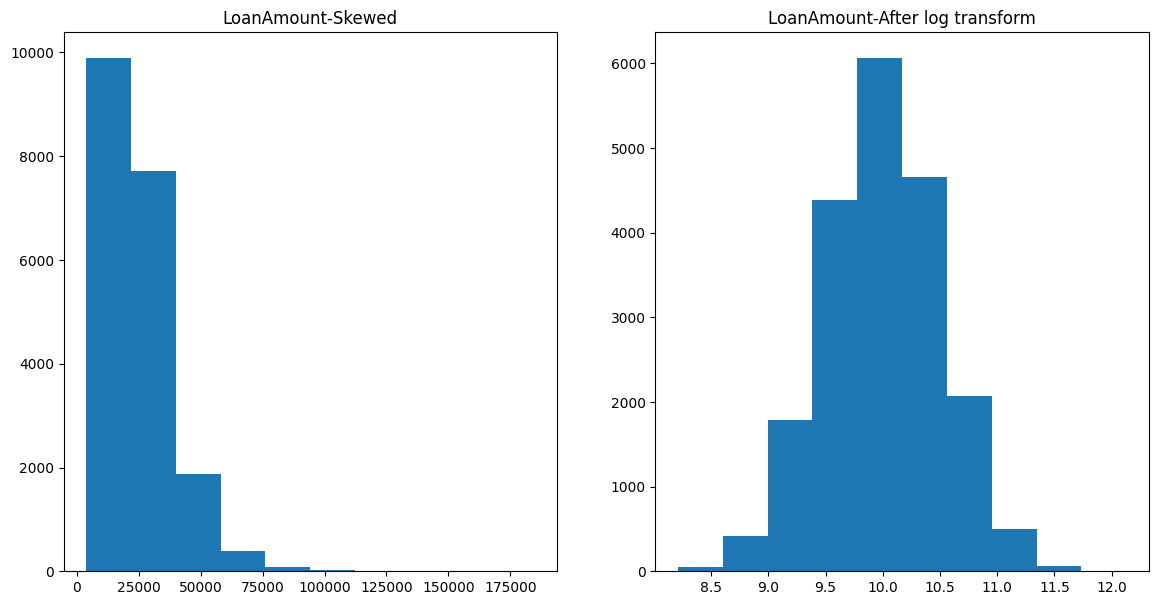

In [41]:
plt.figure(figsize=(14,7))
ax1=plt.subplot(1,2,1)
cp=plt.hist(loan_df_copy['LoanAmount'])
plt.title("LoanAmount-Skewed")
ax2=plt.subplot(1,2,2)
plt.hist(loan_df['LoanAmount'])
plt.title("LoanAmount-After log transform")
plt.show()

In [42]:
numeric_columns=loan_df.drop(columns=['LoanApproved']).select_dtypes(include=['number'])
skewness=numeric_columns.skew()
highly_skewed_columns=skewness[abs(skewness)>1].index
for col in highly_skewed_columns:
  loan_df[col]=np.log1p(loan_df[col])
loan_df.head()

,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,...,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore,BankBalance
0,45,10.595359,617,0.0,3,22,9.484405,48,1,2,...,0.724972,11,11.751383,0.199652,0.227590,6.042172,0.166427,0,49.0,9.086476
1,38,10.589358,628,0.0,1,15,10.167619,48,2,1,...,0.935132,3,10.683042,0.207045,0.201077,6.678410,0.329198,0,52.0,8.998137
2,47,10.614597,570,0.0,2,26,9.777244,36,1,2,...,0.872241,6,8.557567,0.217627,0.212548,6.503400,0.379913,0,52.0,7.485492
3,58,11.143093,545,0.0,0,34,10.542680,96,2,1,...,0.896155,5,11.507440,0.300398,0.300911,6.955123,0.272389,0,54.0,7.970049
4,37,11.545054,594,0.0,1,17,9.125327,36,1,1,...,0.941369,5,12.332793,0.197184,0.175990,5.802659,0.067855,1,36.0,8.785234


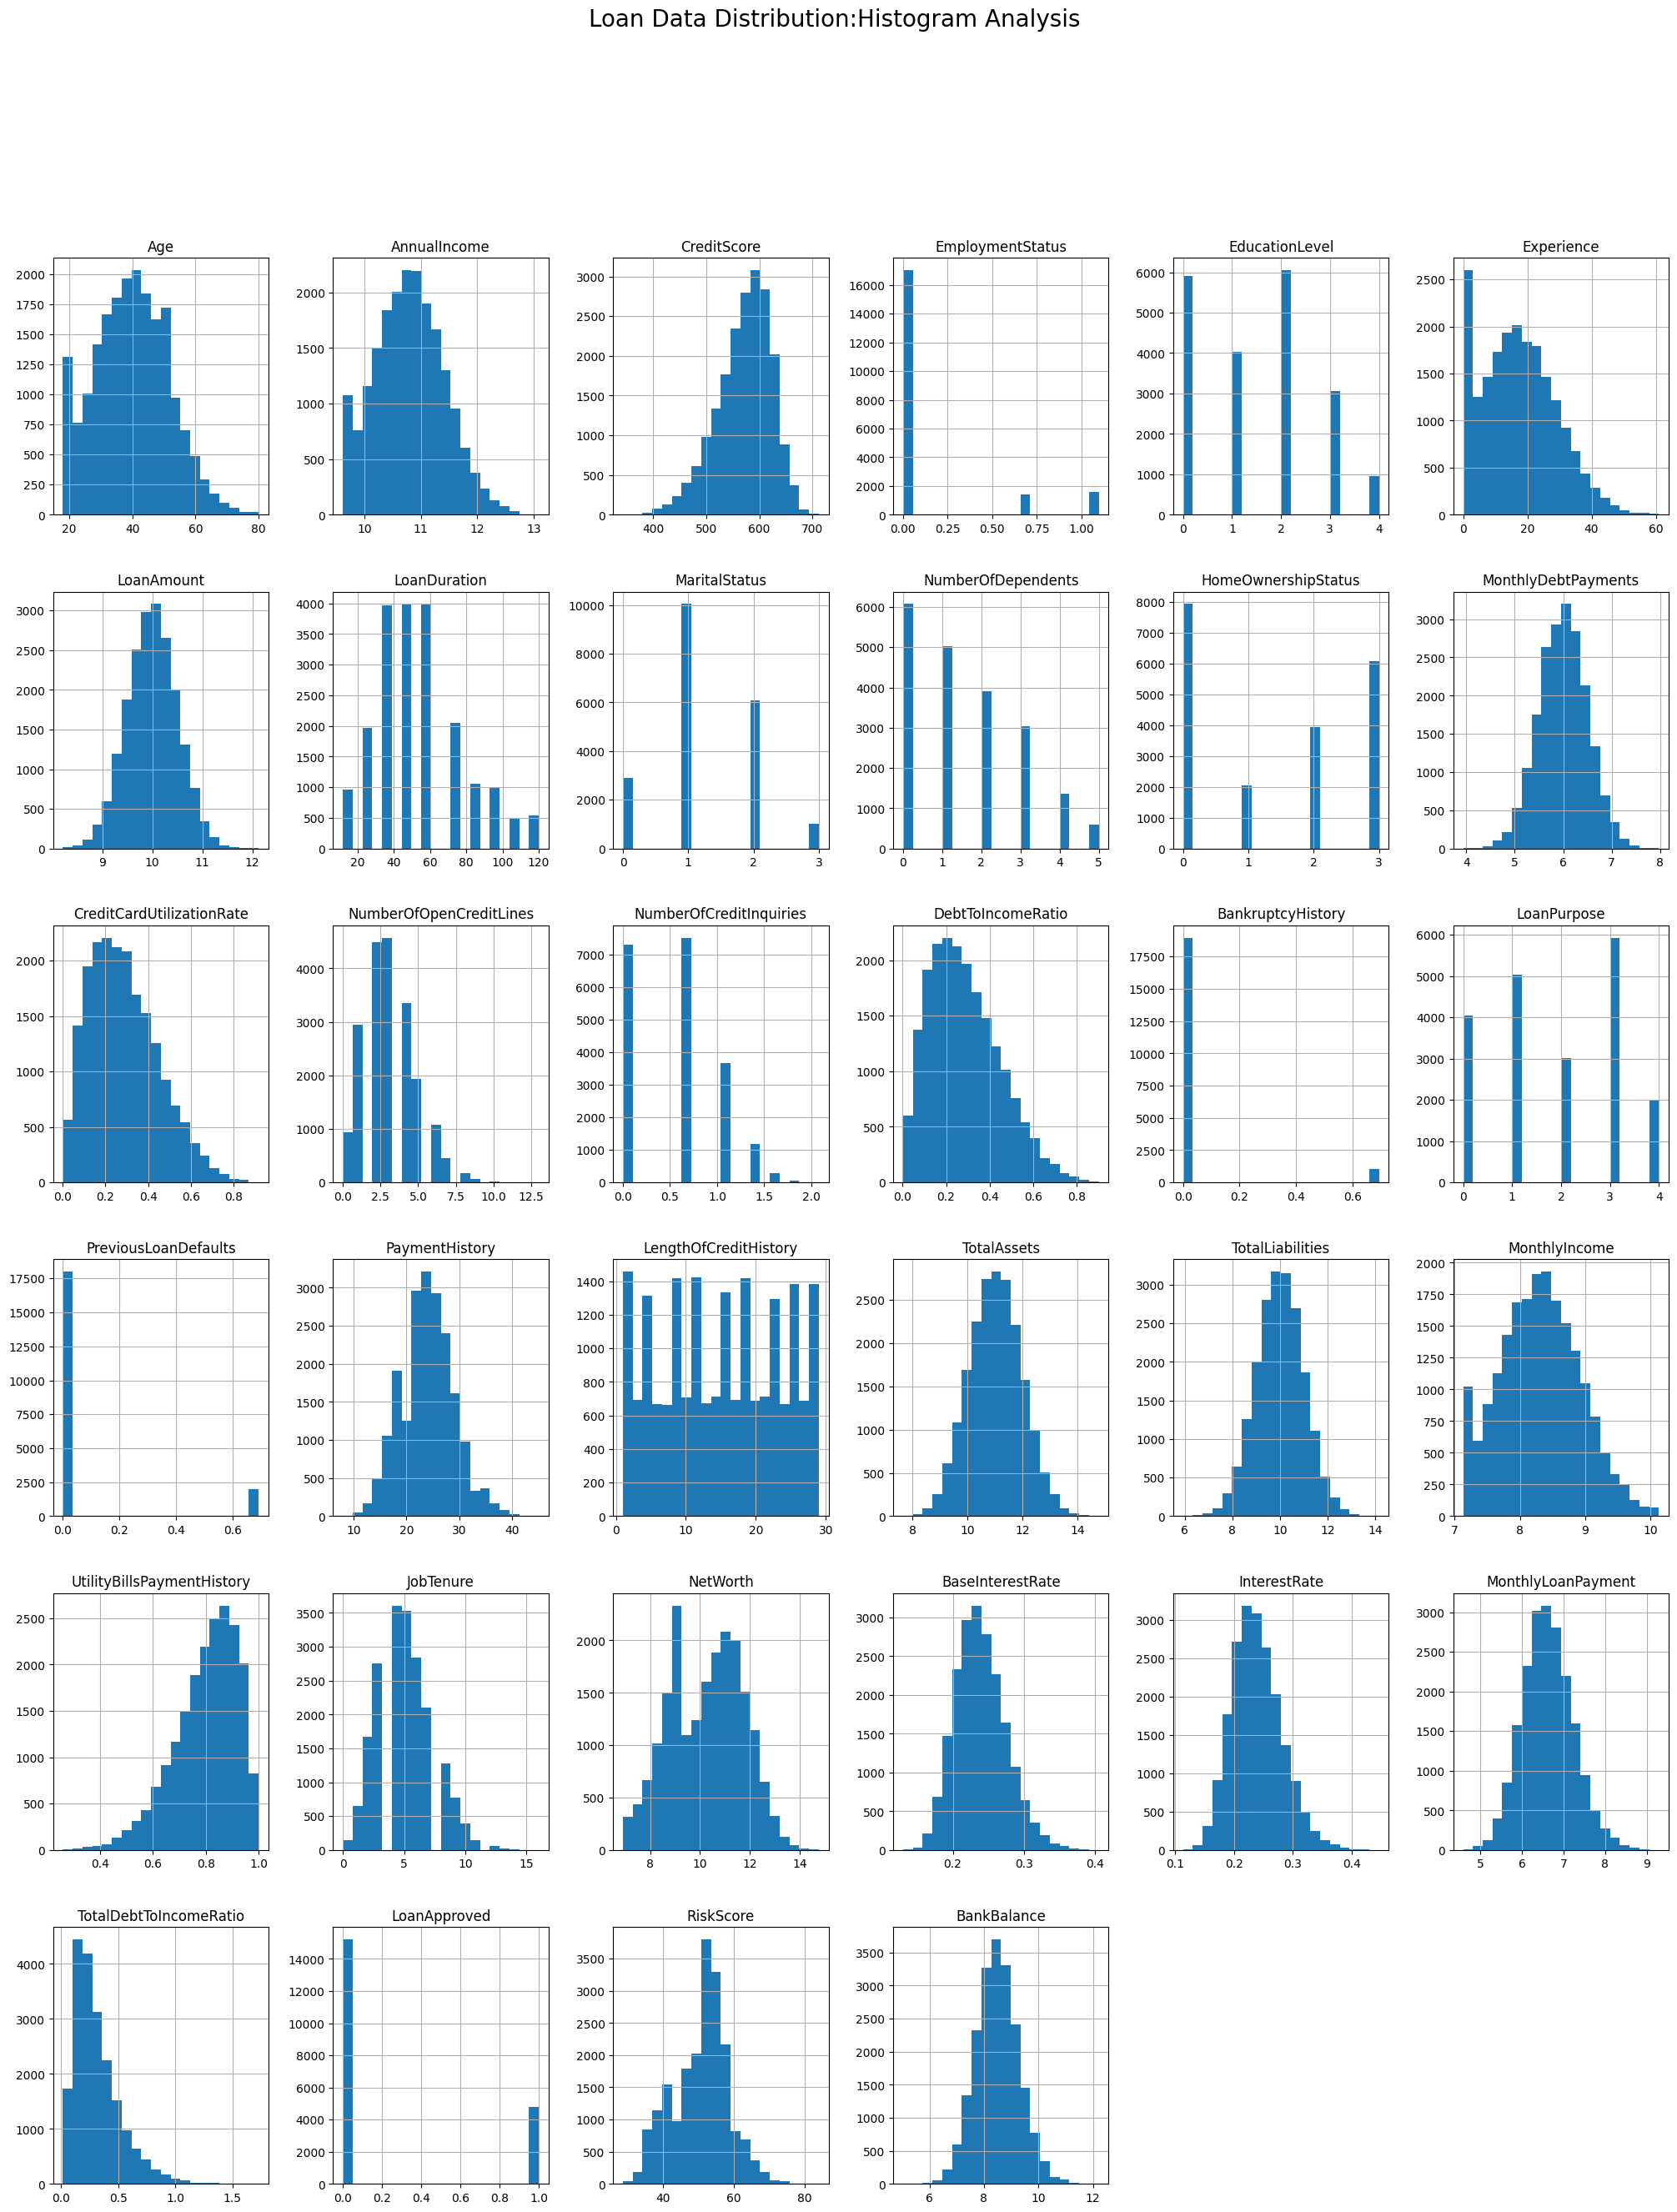

In [43]:
loan_df.hist(figsize=(25,30),bins=20)
plt.suptitle("Loan Data Distribution:Histogram Analysis",fontsize=20)
plt.show()

##Removing Unwanted Features

###Based on Correlation

After analyzing the correlations,you can remove:

*   One among two Highly correlated features(between features themselves)
*   Features with low correlation with the target variable



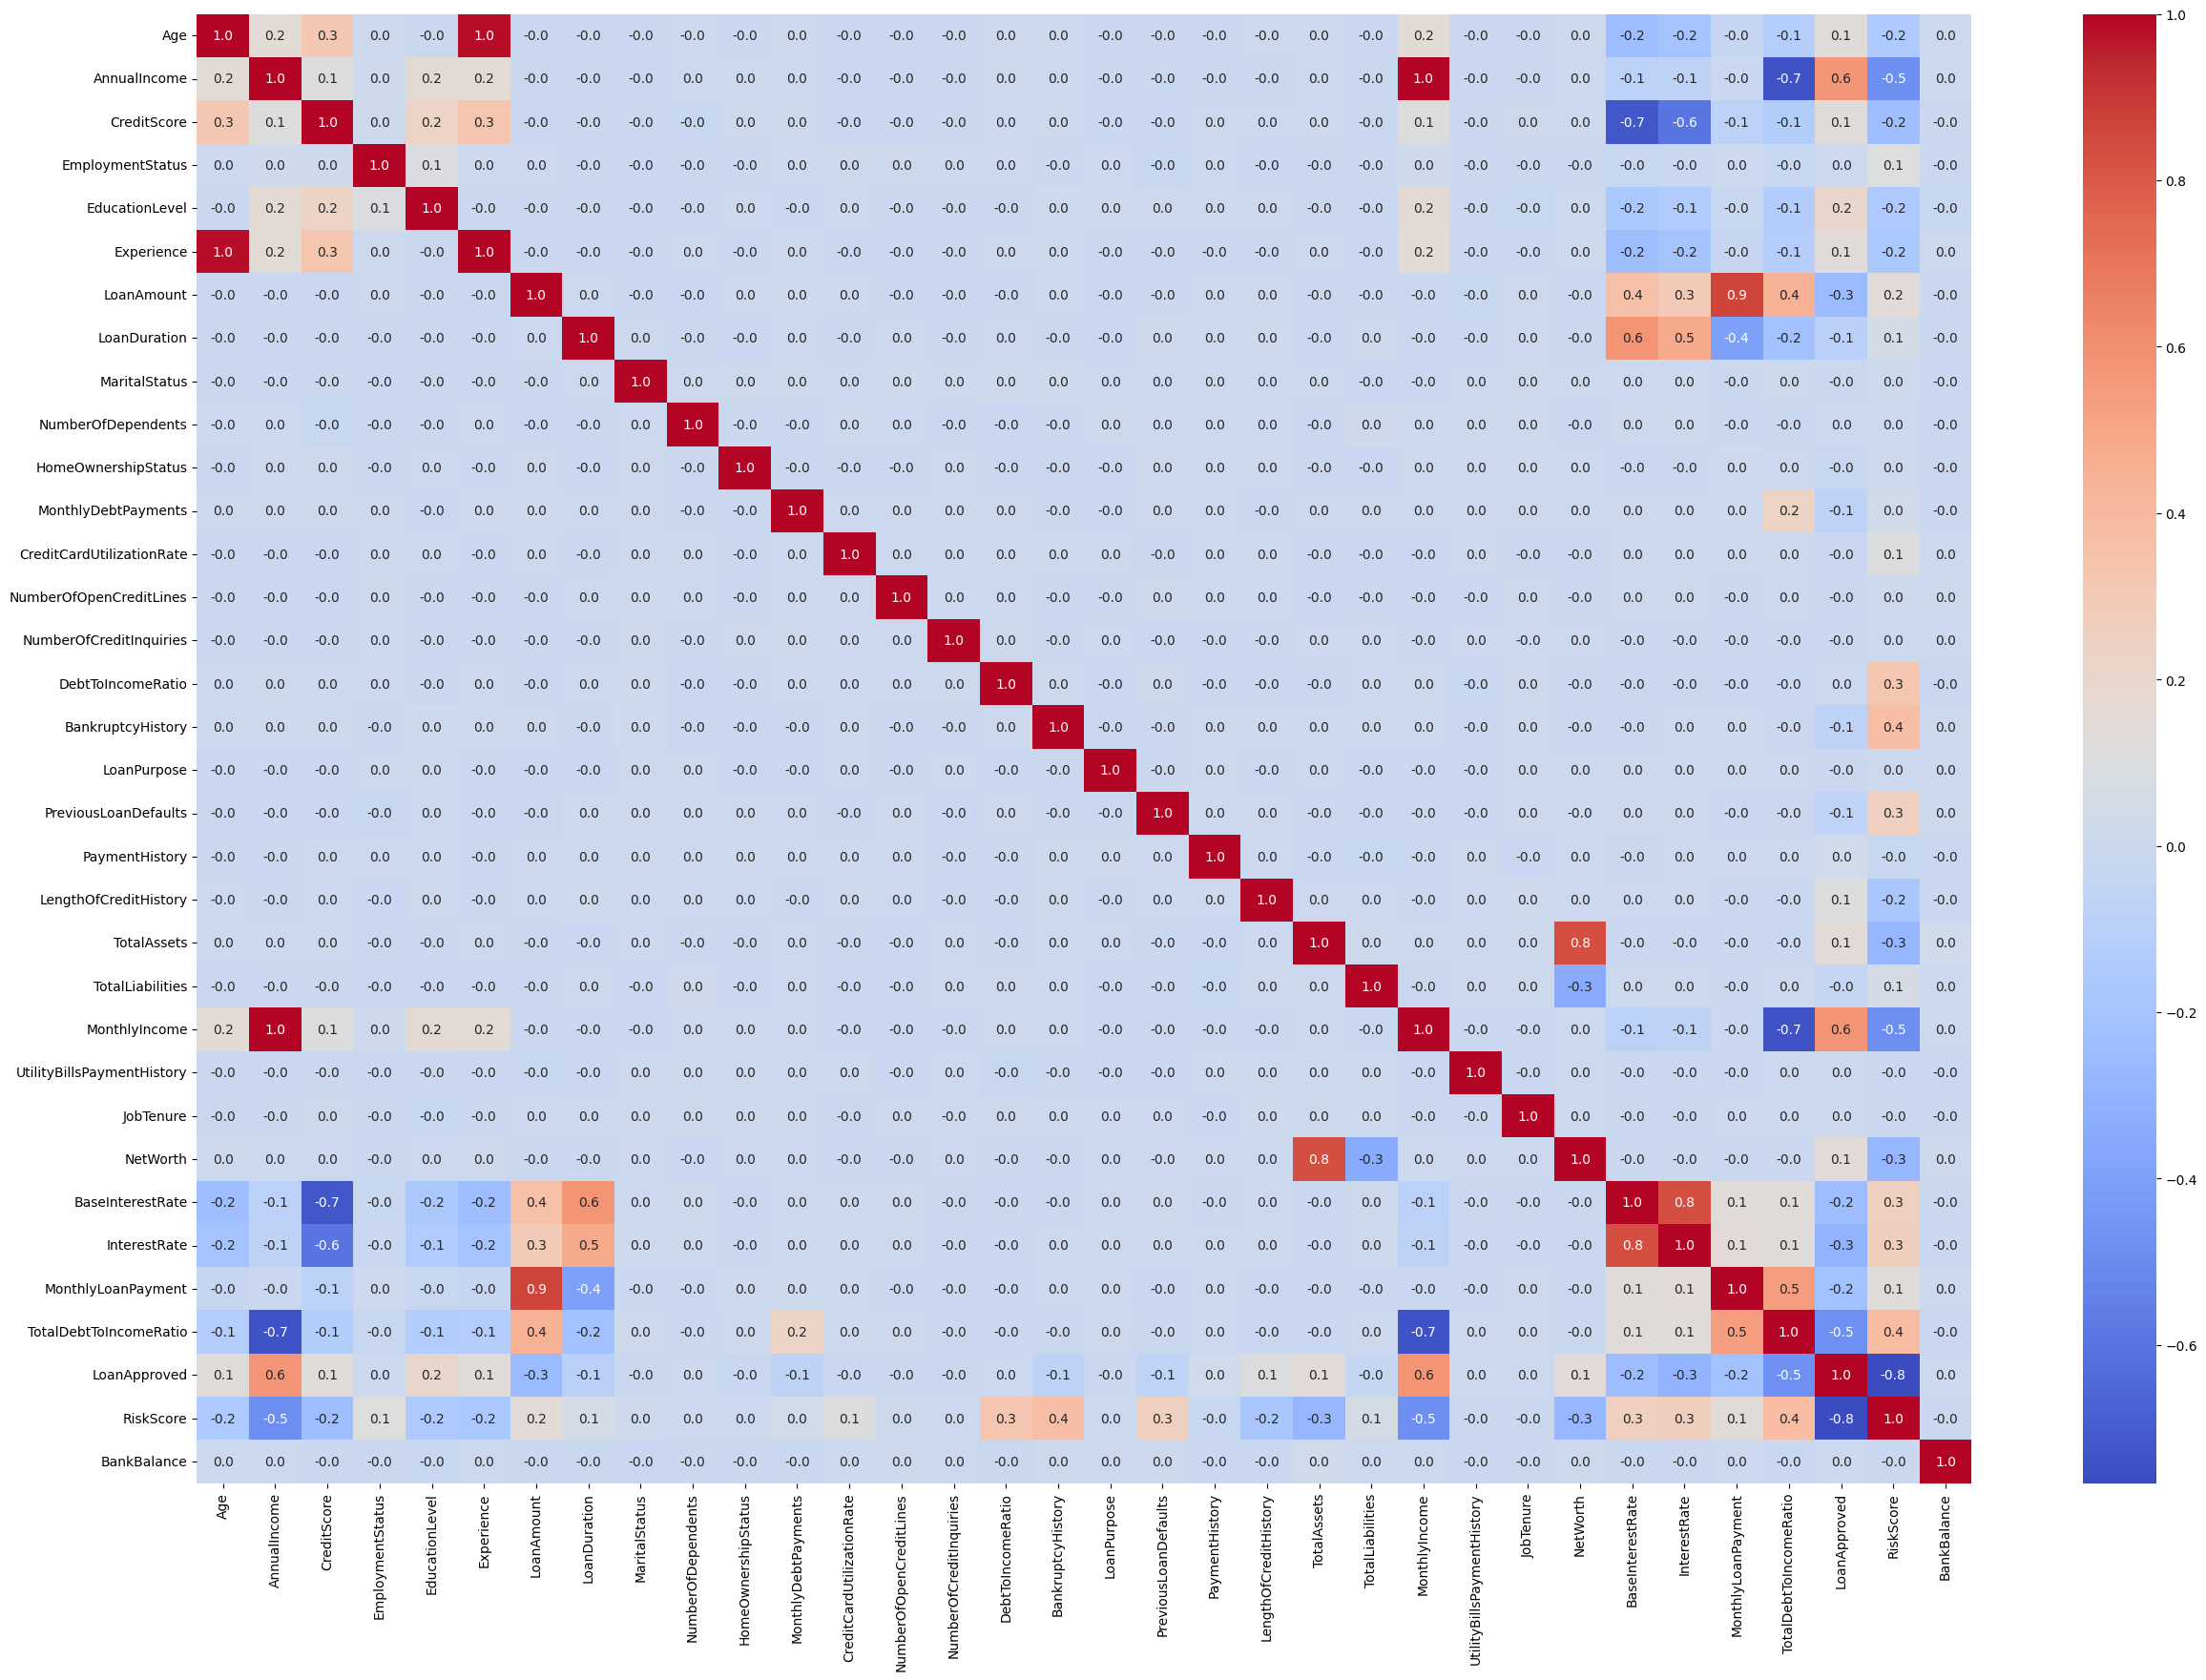

In [44]:
plt.figure(figsize=(30,20))
loan_df.corr(numeric_only=True)
sns.heatmap(loan_df.corr(numeric_only=True),annot=True,cmap='coolwarm',fmt='0.01f',annot_kws=None)
plt.show()

In [45]:
correlation_matrix=loan_df.corr()
threshold=0.5
highly_correlated_pairs=[]
for i in range(len(correlation_matrix.columns)):
  for j in range(i):
    if abs(correlation_matrix.iloc[i,j])>threshold:
      highly_correlated_pairs.append((correlation_matrix.columns[i],correlation_matrix.columns[j]))
print(highly_correlated_pairs)

[('Experience', 'Age'), ('MonthlyIncome', 'AnnualIncome'), ('NetWorth', 'TotalAssets'), ('BaseInterestRate', 'CreditScore'), ('BaseInterestRate', 'LoanDuration'), ('InterestRate', 'CreditScore'), ('InterestRate', 'BaseInterestRate'), ('MonthlyLoanPayment', 'LoanAmount'), ('TotalDebtToIncomeRatio', 'AnnualIncome'), ('TotalDebtToIncomeRatio', 'MonthlyIncome'), ('TotalDebtToIncomeRatio', 'MonthlyLoanPayment'), ('LoanApproved', 'AnnualIncome'), ('LoanApproved', 'MonthlyIncome'), ('RiskScore', 'LoanApproved')]


Features with a correlation value of 0.5 or higher (positive or negative) should be considered for removal, as they are highly correlated.

In [46]:
loan_df.drop(['Experience','AnnualIncome','TotalAssets','BaseInterestRate','MonthlyLoanPayment'],axis=1,inplace=True)

In [47]:
loan_df[['TotalDebtToIncomeRatio','MonthlyIncome']].corr()

,TotalDebtToIncomeRatio,MonthlyIncome
TotalDebtToIncomeRatio,1.000000,-0.736617
MonthlyIncome,-0.736617,1.000000


In [48]:
loan_df.drop("TotalDebtToIncomeRatio",axis=1,inplace=True)

In [49]:
corr_with_target=loan_df.corr()['LoanApproved'].sort_values(ascending=False)
low_corr_features=corr_with_target[(corr_with_target<0.05) & (corr_with_target>-0.05)]
print("Features with correlation between -0.05 and 0.05:")
print(low_corr_features)

Features with correlation between -0.05 and 0.05:
PaymentHistory                0.030804
JobTenure                     0.004997
BankBalance                   0.004973
EmploymentStatus              0.004627
UtilityBillsPaymentHistory    0.003303
NumberOfDependents            0.001717
DebtToIncomeRatio             0.000034
NumberOfOpenCreditLines      -0.004769
MaritalStatus                -0.006828
NumberOfCreditInquiries      -0.006837
LoanPurpose                  -0.007062
CreditCardUtilizationRate    -0.010466
HomeOwnershipStatus          -0.018135
TotalLiabilities             -0.033293
Name: LoanApproved, dtype: float64


In [50]:
loan_df.drop(['JobTenure','UtilityBillsPaymentHistory','NumberOfDependents','DebtToIncomeRatio','NumberOfOpenCreditLines','NumberOfCreditInquiries','MaritalStatus','LoanPurpose'],axis=1,inplace=True)

The goal is to retain features that are strongly correlated with target variable(either positively or negatively)and remove those that have little or n relationship

In [51]:
corr_with_target=loan_df.corr()['RiskScore'].sort_values(ascending=False)
low_corr_features=corr_with_target[(corr_with_target<0.05) & (corr_with_target>-0.05)]
print("Features with correlation between -0.01 and 0.01:")
print(low_corr_features)

Features with correlation between -0.01 and 0.01:
MonthlyDebtPayments    0.037533
HomeOwnershipStatus    0.004454
BankBalance           -0.001408
PaymentHistory        -0.016992
Name: RiskScore, dtype: float64


In [52]:
loan_df.drop(['MonthlyDebtPayments','HomeOwnershipStatus','PaymentHistory','BankBalance'],axis=1,inplace=True)

In [53]:
loan_df.columns

Index(['Age', 'CreditScore', 'EmploymentStatus', 'EducationLevel',
       'LoanAmount', 'LoanDuration', 'CreditCardUtilizationRate',
       'BankruptcyHistory', 'PreviousLoanDefaults', 'LengthOfCreditHistory',
       'TotalLiabilities', 'MonthlyIncome', 'NetWorth', 'InterestRate',
       'LoanApproved', 'RiskScore'],
      dtype='object')

In [54]:
#correlation with the target variable
#loan_df.corr()['RiskScore].sort_values(ascending=False)

In [55]:
loan_df.drop(['LoanDuration'],axis=1,inplace=True)

In [56]:
loan_df.drop(['EducationLevel'],axis=1,inplace=True)

In [57]:
loan_df.drop(['Age'],axis=1,inplace=True)

In [58]:
loan_df.columns

Index(['CreditScore', 'EmploymentStatus', 'LoanAmount',
       'CreditCardUtilizationRate', 'BankruptcyHistory',
       'PreviousLoanDefaults', 'LengthOfCreditHistory', 'TotalLiabilities',
       'MonthlyIncome', 'NetWorth', 'InterestRate', 'LoanApproved',
       'RiskScore'],
      dtype='object')

###PCA

PCA reduces the number of features(dimensions) in a a dataset.

*   Principal Components:These are the new features created by PCA.Each principal component is a linear combination of he orginal features, and they are ranked based on the amount of variance they explain in the data.

In [59]:
from sklearn.decomposition import PCA
#apply PCA
pca=PCA(n_components=5)#you can change the number of components to retain
loan_pca=pca.fit_transform(loan_df)
#create a DataFrame with the PCA results
loan_pca_loan_loan_df=pd.DataFrame(loan_pca,columns=[f'PC{i+1}' for i in range(loan_pca.shape[1])])
#step5:Combine the PCA components with the orginal dataframe if needed
loan_pca_final_loan_loan_df=pd.concat([loan_df.reset_index(drop=True),loan_pca_loan_loan_df],axis=1)
#now loan_pca_final_loan_loan_df contains the orginal data along with the pca components
loan_pca_loan_loan_df.head()

,PC1,PC2,PC3,PC4,PC5
0,45.415159,-5.118034,-3.169901,1.365555,0.452041
1,56.295074,-6.875965,-0.186670,0.848145,-0.549305
2,-1.650946,5.432537,4.699439,-2.103806,1.017615
3,-26.719522,-5.348422,-0.664908,1.747973,-0.832056
4,22.939599,17.473038,-6.044747,1.257780,0.367092


##Scaling

Standardization and Normalization are two common techniques  used in data processing to scale features.

###Standardization:

Standardization transforms data to have a mean of 0 and a standard devaiation of 1.This is done by substracting the mean of the data and dividng by the standard deviation.
Standardization is useful when your data follows a normal distribution or if using machine learning algorithms that assume normally distributed data(e.g. linear regression,logistic regression,SVM,etc.).It works well with algorithms that rely on the distance between data points(e.g.k-NN,PCA).

In [60]:
#Create the copy of orginal data for comparison
loan_scaled_loan_loan_df=loan_df.copy()
#select numeric columns,excluding 'LoanApproved'
numeric_columns=loan_scaled_loan_loan_df.drop(columns=['LoanApproved']).select_dtypes(include=['number']).columns
#initialize the standardscaler
scaler=StandardScaler()
#apply the scaler only to the numeric columns
loan_scaled_loan_loan_df[numeric_columns]=scaler.fit_transform(loan_scaled_loan_loan_df[numeric_columns])
loan_scaled_loan_loan_df.head()

,CreditScore,EmploymentStatus,LoanAmount,CreditCardUtilizationRate,BankruptcyHistory,PreviousLoanDefaults,LengthOfCreditHistory,TotalLiabilities,MonthlyIncome,NetWorth,InterestRate,LoanApproved,RiskScore
0,0.890021,-0.40547,-1.014008,0.425792,-0.235154,-0.333426,-0.711630,-0.136881,-0.324366,1.020941,-0.272968,0,-0.227149
1,1.105724,-0.40547,0.343015,-1.242602,-0.235154,-0.333426,-0.711630,-0.828648,-0.334247,0.287206,-0.901165,0,0.158551
2,-0.031618,-0.40547,-0.432362,-0.932273,-0.235154,-0.333426,0.841287,1.765237,-0.292687,-1.172566,-0.629370,0,0.158551
3,-0.521852,-0.40547,1.087972,-0.117617,-0.235154,-0.333426,-0.592175,-1.408173,0.577602,0.853401,1.464331,0,0.415684
4,0.439006,-0.40547,-1.727221,0.213746,-0.235154,-0.333426,1.438563,-0.240858,1.239575,1.420252,-1.495584,1,-1.898515


###Normalization:

Normalization transforms data to specific range,usually [0,1]or[-1,1].The idea is to rescale the data without distorting the differences in the ranges of values.
Normalization is preferred when you know that the data does not follow a normal distribution and when you need to constrain the data within a fixed range.It is commonly used in algorithms such as neural networks and k-means clustering,where the magnitude of the data matters.  

##Handling Outliers

###Boxplots

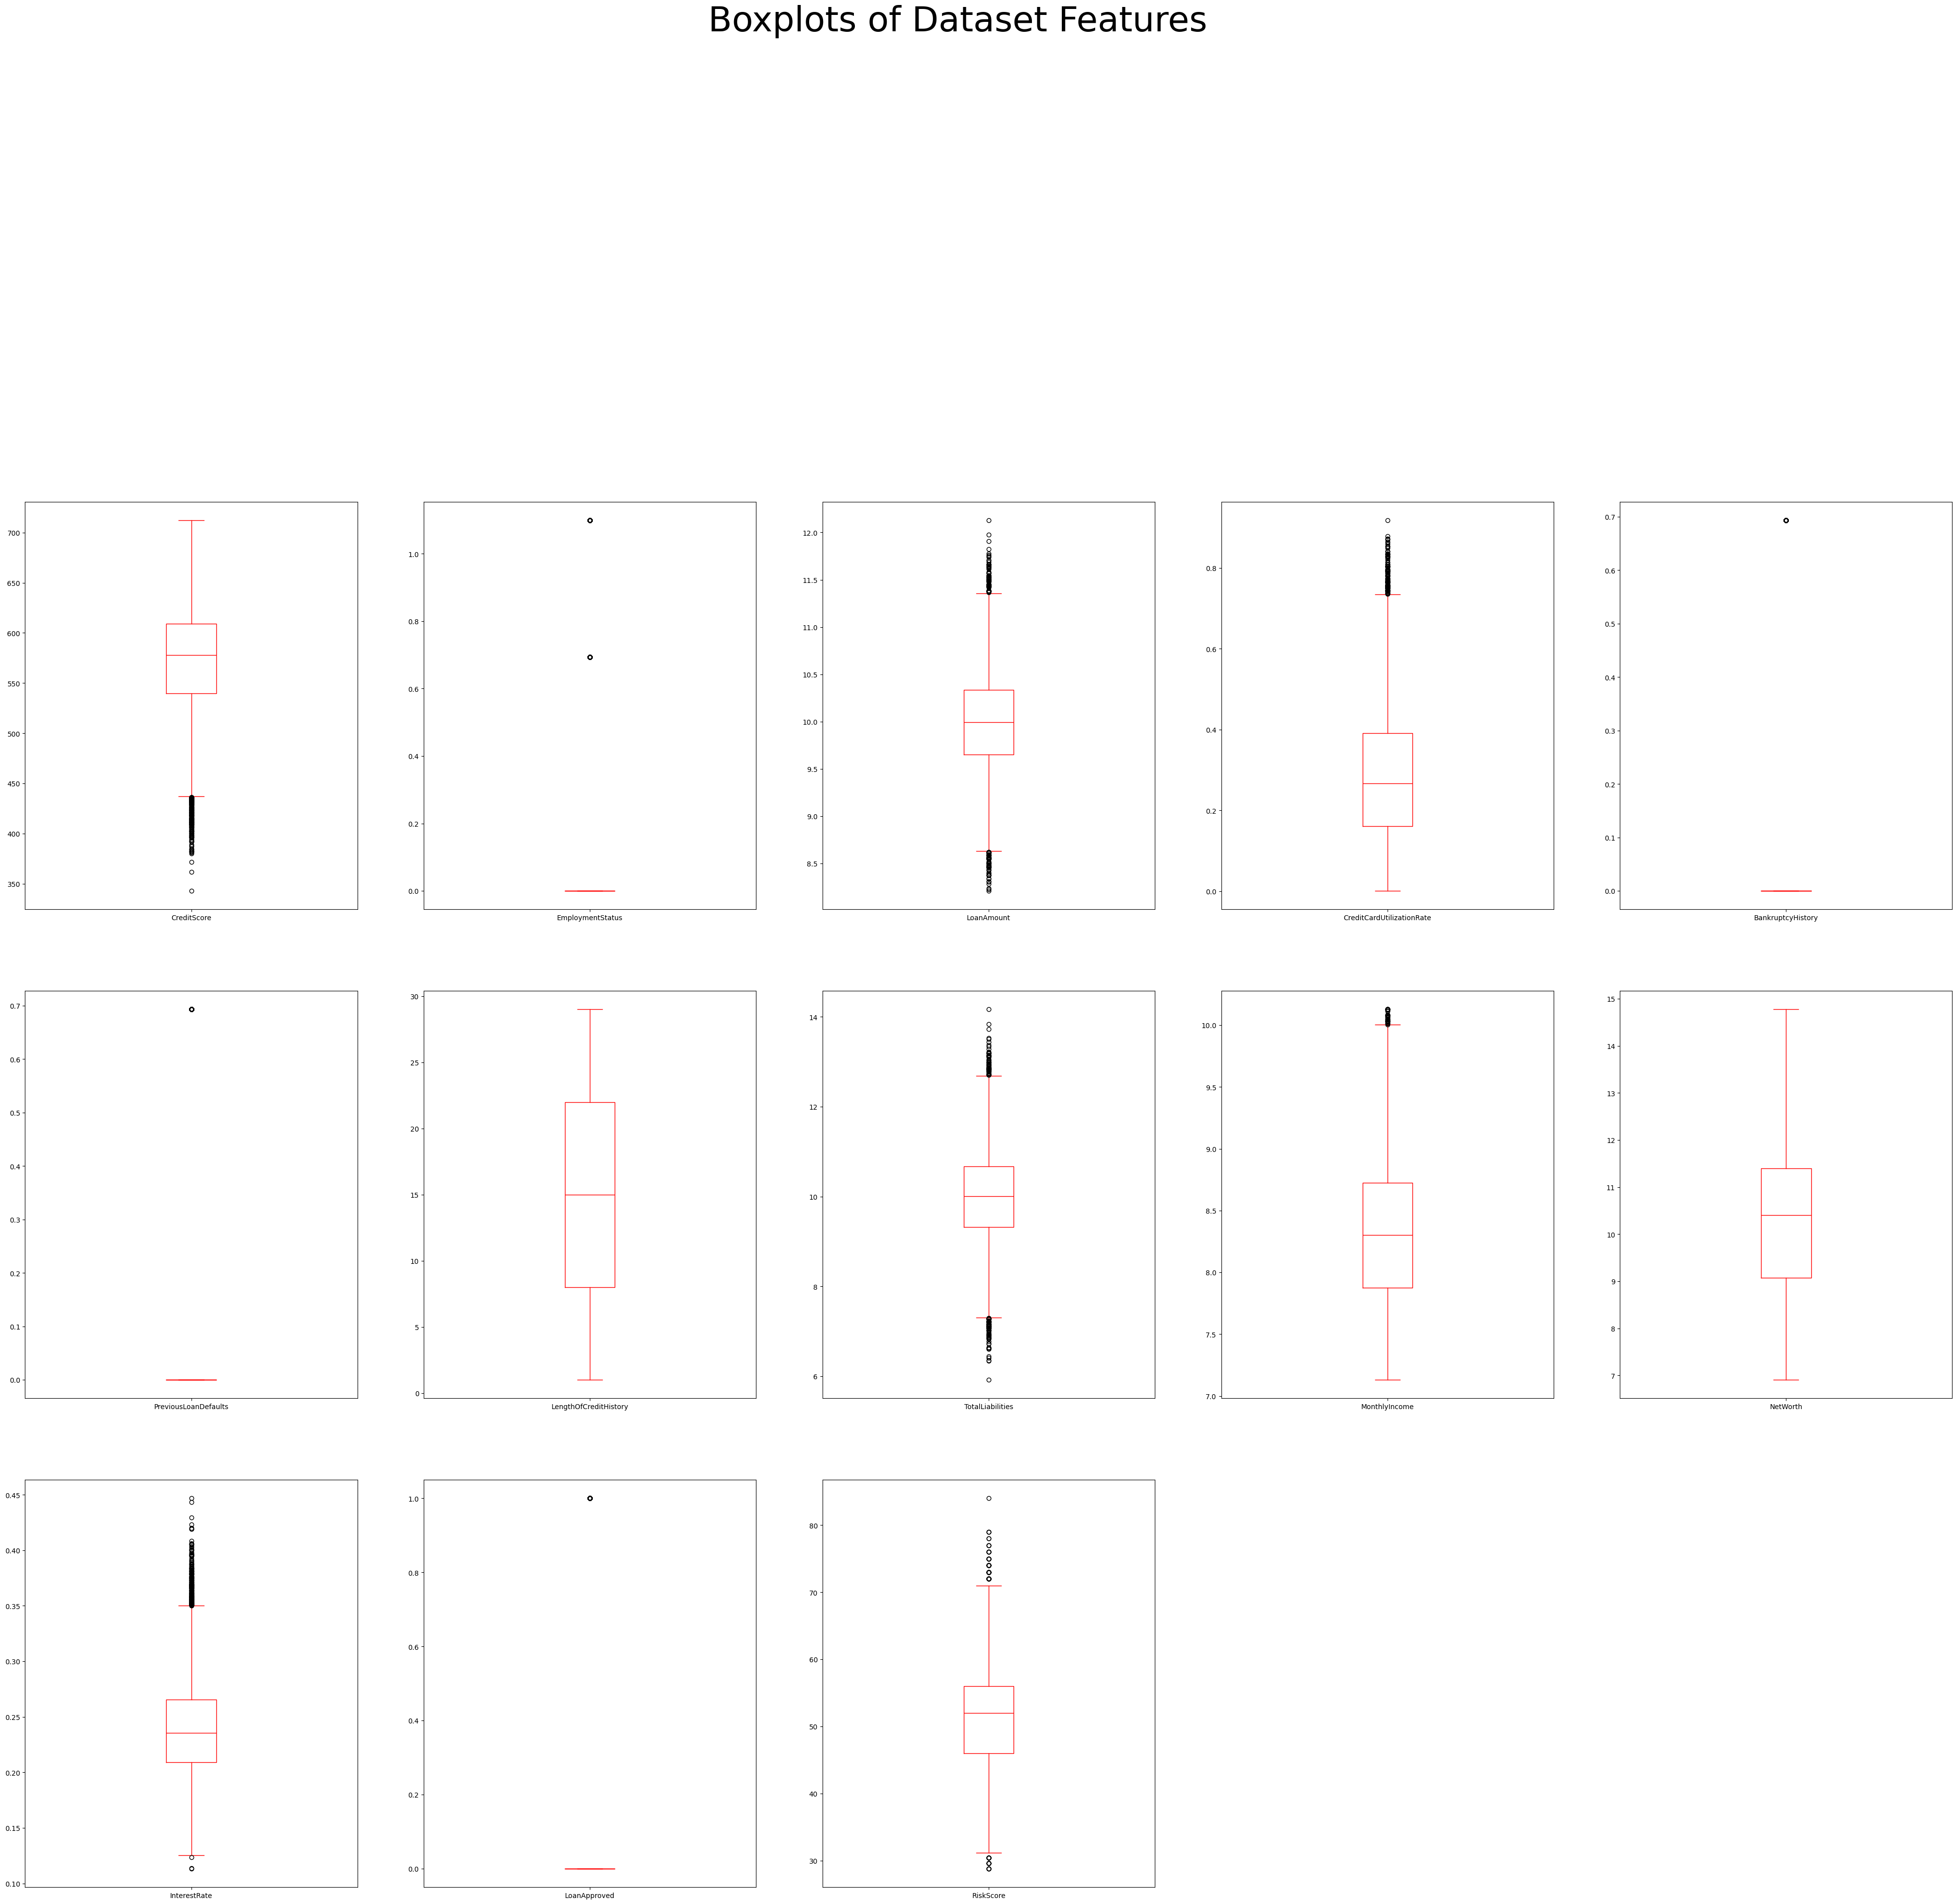

In [61]:
loan_df.plot(kind='box',subplots=True,layout=(8,5),figsize=(50,100),color='red')
plt.suptitle('Boxplots of Dataset Features',fontsize=50)
plt.show()

In [62]:
#create a copy of the original data for comparison
loan_df_copy = loan_df.copy()

def remove_outliers_iqr( loan_df,exclude_columns):

  #loop through numeric columns
  for column in loan_df.select_dtypes(include=['number']):
    if column in exclude_columns:
      continue #skip excluded columns
    Q1= loan_df[column].quantile(0.25)
    Q3=loan_df[column].quantile(0.75)
    IQR=Q3-Q1

    #define outlier bounds
    lower_bound= Q1-1.5* IQR
    upper_bound= Q3 + 1.5 * IQR
    #filter out the outliers
    loan_df=loan_df[(loan_df[column]>=lower_bound)&(loan_df[column]<=upper_bound)]
  return loan_df

#definethe columns to exclude
exclude_columns=['LoanApproved','RiskScore']

#removing outliers
loan_df=remove_outliers_iqr(loan_df,exclude_columns)

#print shapes of data before and after removing outliers
print("shape of data before removing outliers:",loan_df_copy.shape)
print("shape of data before removing outliers:",loan_df.shape)
print("number of outliers removed :", loan_df_copy.shape[0]-loan_df.shape[0])

shape of data before removing outliers: (20000, 13)
shape of data before removing outliers: (13849, 13)
number of outliers removed : 6151


# Model-Training and Evaluation

## Regression Modeling

**Risk score regression :** To predict  a continous risk score associated with each individuals likelihood of loan default or financial instability.

In [63]:
x1=loan_df.drop('RiskScore',axis=1)
y1=loan_df[['RiskScore']]

In [64]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,random_state=42,test_size=0.2)

print('Shape of traiining features :',x1_train.shape)
print('Shape of traiining features :',x1_test.shape)
print('Shape of traiining features :',y1_train.shape)
print('Shape of traiining features :',y1_test.shape)

Shape of traiining features : (11079, 12)
Shape of traiining features : (2770, 12)
Shape of traiining features : (11079, 1)
Shape of traiining features : (2770, 1)


In [65]:
models={
    'Linear_regression': LinearRegression(),
    'RandomForest_Regressor': RandomForestRegressor(),
    'GradientBoosting_Regressor': GradientBoostingRegressor(),
    'DecisionTree_Regressor': DecisionTreeRegressor(),
    'SVM': SVR(),
    'AdaBoostRegressor': AdaBoostRegressor(),
    'ExtraTreesRegressor': ExtraTreesRegressor(),
    'BaggingRegressor' : BaggingRegressor(),
    'LGBMRegressor' : LGBMRegressor(),
    #'CatBoostRegressor' : 'CatBoostRegressor(),
    'XGBRegressor' : XGBRegressor()
}

In [66]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Dictionary to store results
results = {'Model': [], 'MSE': [], 'MAE': [], 'R2': []}

# Loop through the models, train them, and calculate the metrics
for model_name, model in models.items():
    # Train the model
    model.fit(x1_train, y1_train)

    # Make predictions
    y1_pred = model.predict(x1_test)

    # Calculate metrics
    mse = mean_squared_error(y1_test, y1_pred)
    mae = mean_absolute_error(y1_test, y1_pred)
    r2 = r2_score(y1_test, y1_pred)

    # Store results in the dictionary
    results['Model'].append(model_name)
    results['MSE'].append(mse)
    results['MAE'].append(mae)
    results['R2'].append(r2)

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Display the results
results_df

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001302 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1797
[LightGBM] [Info] Number of data points in the train set: 11079, number of used features: 9
[LightGBM] [Info] Start training from score 48.872335


,Model,MSE,MAE,R2
0,Linear_regression,9.788375,2.558468,0.791813
1,RandomForest_Regressor,7.566229,2.322713,0.839076
2,GradientBoosting_Regressor,6.947814,2.255822,0.852228
3,DecisionTree_Regressor,14.863032,3.073141,0.683881
4,SVM,42.864179,5.085760,0.088331
5,AdaBoostRegressor,7.953554,2.448237,0.830838
6,ExtraTreesRegressor,7.774907,2.357518,0.834637
7,BaggingRegressor,8.267173,2.406542,0.824167
8,LGBMRegressor,7.129065,2.269784,0.848374
9,XGBRegressor,7.861235,2.342259,0.832801


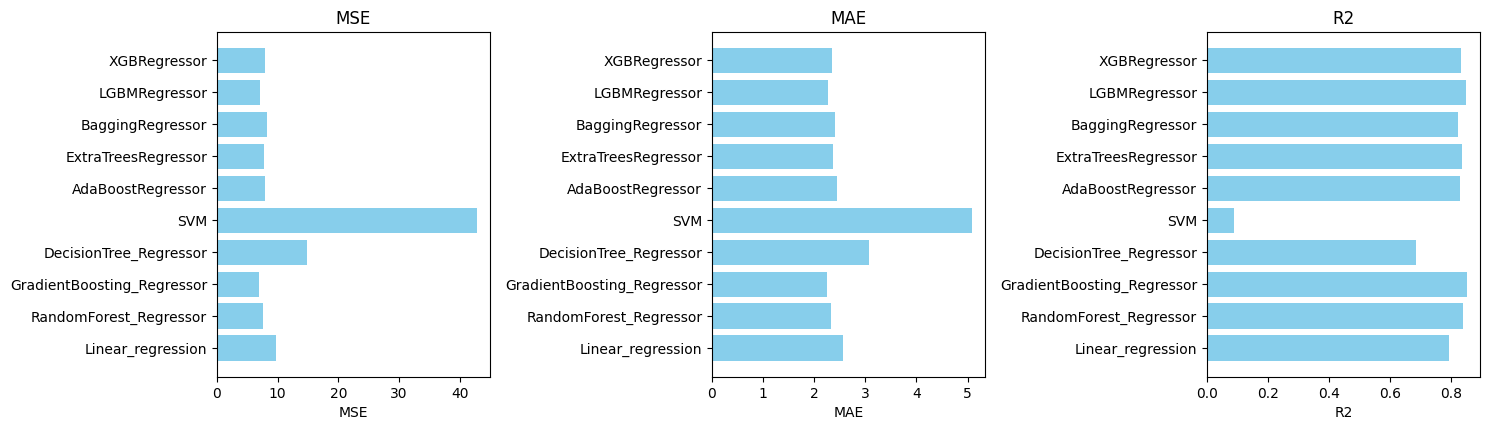

In [67]:
#ploting each metric
metrics=['MSE','MAE','R2']
plt.figure(figsize=(15,8))

for i,metric in enumerate(metrics):
    plt.subplot(2,3,i+1)
    plt.barh(results_df['Model'],results_df[metric],color='skyblue')
    plt.title(metric)
   # plt.xlim(0,1)
    plt.xlabel(metric)
plt.tight_layout()
plt.show()

### Regression On Scaled Data

In [68]:
x1s = loan_scaled_loan_loan_df.drop('RiskScore', axis=1)
y1s = loan_scaled_loan_loan_df[['RiskScore']]
x1s_train, x1s_test, y1s_train, y1s_test = train_test_split(x1s, y1s, random_state=42, test_size=0.2)

# Dictionary to store results
results = {'Model': [], 'MSE': [], 'MAE': [], 'R2': []}

# Loop through the models, train them, and calculate the metrics
for model_name, model in models.items():
    # Train the model
    model.fit(x1s_train, y1s_train.values.ravel()) # Fix: Ravel y1s_train for some models

    # Make predictions
    y1s_pred = model.predict(x1s_test)

    # Calculate metrics
    mse1 = mean_squared_error(y1s_test, y1s_pred)
    mae1 = mean_absolute_error(y1s_test, y1s_pred)
    r21 = r2_score(y1s_test, y1s_pred)

    # Store results in the dictionary
    results['Model'].append(model_name)
    results['MSE'].append(mse1)
    results['MAE'].append(mae1)
    results['R2'].append(r21)

# Convert results to a DataFrame
results_df1 = pd.DataFrame(results)

# Display the results
results_df1 = results_df1.sort_values(by='MSE', ascending=True)

# Display the sorted DataFrame with background gradient
results_df1.style.background_gradient('Blues')

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002365 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1796
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 12
[LightGBM] [Info] Start training from score 0.009876


,Model,MSE,MAE,R2
2,GradientBoosting_Regressor,0.114006,0.287940,0.888912
8,LGBMRegressor,0.115395,0.288974,0.887558
9,XGBRegressor,0.126808,0.299352,0.876438
6,ExtraTreesRegressor,0.127485,0.299801,0.875778
1,RandomForest_Regressor,0.127913,0.300221,0.875361
7,BaggingRegressor,0.139702,0.310438,0.863874
4,SVM,0.141548,0.306124,0.862075
0,Linear_regression,0.159740,0.326390,0.844348
5,AdaBoostRegressor,0.174595,0.353427,0.829873
3,DecisionTree_Regressor,0.244943,0.389255,0.761326


Based on the analysis of the loan approval dataset for predicting the Riskscore, the gradientboostingregressor model demonstrated the best performance among the tested models.

## Classification Modeling

**Binary Loan Approval Classification :** To determine the binary outcome of loan approval, indicating whether an applicant is likely to be approved or denied for a loan.

In [69]:
#convert 'LoanApproved' from float to int
loan_df['LoanApproved']=loan_df['LoanApproved'].astype(int)

x=loan_df.drop('LoanApproved',axis=1)
y=loan_df[['LoanApproved']]

In [70]:
loan_df[['LoanApproved']].value_counts()

,count
LoanApproved,
0,10254
1,3595


In [71]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

print('Shape of Training Features',x_train.shape)
print('Shape of Testing Features',x_test.shape)
print('Shape of Traing Target',y_train.shape)
print('Shape of Testing Target',y_test.shape)

Shape of Training Features (11079, 12)
Shape of Testing Features (2770, 12)
Shape of Traing Target (11079, 1)
Shape of Testing Target (2770, 1)


In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

clas_models = {
    'ir': LogisticRegression(max_iter=500),
    'rfc': RandomForestClassifier(),
    'dtc': DecisionTreeClassifier(),
    'knn': KNeighborsClassifier(n_neighbors=11),
    'svm': SVC(kernel='linear'),
    'gbc': GradientBoostingClassifier(random_state=0, learning_rate=0.45),
    'etc': ExtraTreesClassifier(),
    'nb': GaussianNB()
}

# Example usage:
for model_name, model in clas_models.items():
    print(f"Training {model_name}...")
    model.fit(x_train, y_train.values.ravel())  # Assuming x_train and y_train are defined
    # ... (rest of your model training and evaluation code) ...

Training ir...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training rfc...
Training dtc...
Training knn...
Training svm...
Training gbc...
Training etc...
Training nb...


In [73]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
results={'Model':[],'Accuracy':[],'Precision':[],'Recall':[],'F1-Score':[]}
for model_name,model in clas_models.items():
    #Train the model
    model.fit(x_train,y_train)
    model_pred=model.predict(x_test)

    #Calculate metrics
    accuracy=accuracy_score(y_test,model_pred)
    precision=precision_score(y_test,model_pred)
    recall=recall_score(y_test,model_pred)
    f1=f1_score(y_test,model_pred)

    #Store results in the dictionary
    results['Model'].append(model)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1-Score'].append(f1)
#convert results to a dataframe
results_df=pd.DataFrame(results)

#display the results in a table
results_df

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return 

,Model,Accuracy,Precision,Recall,F1-Score
0,LogisticRegression(max_iter=500),0.985921,0.985653,0.959497,0.972399
1,"(DecisionTreeClassifier(max_features='sqrt', r...",0.991697,0.991489,0.976257,0.983814
2,DecisionTreeClassifier(),0.992780,0.988764,0.983240,0.985994
3,KNeighborsClassifier(n_neighbors=11),0.981588,0.979798,0.948324,0.963804
4,SVC(kernel='linear'),0.989170,0.988604,0.969274,0.978843
5,([DecisionTreeRegressor(criterion='friedman_ms...,0.997834,0.997199,0.994413,0.995804
6,"(ExtraTreeClassifier(random_state=1472549497),...",0.990253,0.990043,0.972067,0.980973
7,GaussianNB(),0.978339,0.959384,0.956704,0.958042


### Classification On scaled Data

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler  # or MinMaxScaler
# ... (Import clas_models as defined earlier) ...


# Prepare the scaled DataFrame (assuming loan_df is your original DataFrame)
loan_scaled_df = loan_df.copy()
numeric_cols = loan_scaled_df.drop(columns=['LoanApproved']).select_dtypes(include=['number']).columns
scaler = StandardScaler()  # Or MinMaxScaler
loan_scaled_df[numeric_cols] = scaler.fit_transform(loan_scaled_df[numeric_cols])

# Split data
x2s = loan_scaled_df.drop('LoanApproved', axis=1)
y2s = loan_scaled_df[['LoanApproved']]
x2s_train, x2s_test, y2s_train, y2s_test = train_test_split(x2s, y2s, random_state=42, test_size=0.2)

# Evaluate models
results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': []}
for model_name, model in clas_models.items():
    model.fit(x2s_train, y2s_train.values.ravel())
    y_pred = model.predict(x2s_test)

    results['Model'].append(model_name)
    results['Accuracy'].append(accuracy_score(y2s_test, y_pred))
    results['Precision'].append(precision_score(y2s_test, y_pred))
    results['Recall'].append(recall_score(y2s_test, y_pred))
    results['F1-Score'].append(f1_score(y2s_test, y_pred))

# Display results
results_df2 = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)
results_df2.style.background_gradient('Blues')

,Model,Accuracy,Precision,Recall,F1-Score
5,gbc,0.997834,0.997199,0.994413,0.995804
2,dtc,0.993141,0.988780,0.984637,0.986704
4,svm,0.992419,0.990127,0.980447,0.985263
0,ir,0.992058,0.991501,0.977654,0.984529
1,rfc,0.991697,0.990099,0.977654,0.983837
6,etc,0.990975,0.991465,0.973464,0.982382
3,knn,0.987726,0.989943,0.962291,0.975921
7,nb,0.978339,0.959384,0.956704,0.958042


#Pickle file

In [76]:
import pickle
#save the regression model
r_model=GradientBoostingRegressor()
r_model.fit(x1s_train,y1s_train.values.ravel())
with open('regression_model.pkl','wb') as file:
  pickle.dump(r_model,file)

#save the classification model
c_model=GradientBoostingClassifier(random_state=0,learning_rate=0.45)
c_model.fit(x2s_train,y2s_train.values.ravel())
with open("classification_model.pkl","wb")as file:
   pickle.dump(r_model,file)